In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/final_year_project/BSE_Stock_Dataset.csv")

<ipython-input-3-5b14a02c1fcc>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/final_year_project/BSE_Stock_Dataset.csv")


In [ ]:
data_e=pd.read_csv("/content/drive/MyDrive/final_year_project/Equity (2).csv")

In [ ]:
data.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Co Name'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673774 entries, 0 to 3673773
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       object 
 1   Open Price                 float64
 2   High Price                 float64
 3   Low Price                  float64
 4   Close Price                float64
 5   WAP                        float64
 6   No.of Shares               int64  
 7   No. of Trades              int64  
 8   Total Turnover (Rs.)       float64
 9   Deliverable Quantity       float64
 10  % Deli. Qty to Traded Qty  float64
 11  Spread High-Low            float64
 12  Spread Close-Open          float64
 13  Co Name                    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 392.4+ MB


In [ ]:
data['Co Name'].nunique()

4124

In [ ]:
#Data Cleaning- Removing companies with less than 2 months data
companies_to_remove = data['Co Name'].value_counts()[data['Co Name'].value_counts() < 100].index.tolist()
data = data[~data['Co Name'].isin(companies_to_remove)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662867 entries, 0 to 3673773
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       object 
 1   Open Price                 float64
 2   High Price                 float64
 3   Low Price                  float64
 4   Close Price                float64
 5   WAP                        float64
 6   No.of Shares               int64  
 7   No. of Trades              int64  
 8   Total Turnover (Rs.)       float64
 9   Deliverable Quantity       float64
 10  % Deli. Qty to Traded Qty  float64
 11  Spread High-Low            float64
 12  Spread Close-Open          float64
 13  Co Name                    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 419.2+ MB


In [ ]:
data['Co Name'].nunique()

3855

In [ ]:
data_e.columns

Index(['Security Code', 'Issuer Name', 'Security Id', 'Security Name',
       'Status', 'Group', 'Face Value', 'ISIN No', 'Industry', 'Instrument',
       'Sector Name', 'Industry New Name', 'Igroup Name', 'ISubgroup Name'],
      dtype='object')

In [ ]:
data_e['Security Code'].nunique()

4244

In [ ]:
data_e['Issuer Name'].nunique()

4236

In [ ]:
column_to_check = 'Issuer Name'

# Use value_counts to get a count of each unique value in the specified column
value_counts = data_e[column_to_check].value_counts()

# Use boolean indexing to filter values that appear more than once
duplicates = value_counts[value_counts > 1].index

# Display the values that appear more than once
print(list(duplicates))

['Reliance Mutual Fund-Permitted', 'Tata Motors Ltd.', 'GACM Technologies Limited', 'Future Enterprises Limited', 'Jain Irrigation Systems Ltd.,']


In [ ]:
data_e = data_e[~data_e[column_to_check].duplicated(keep=False)]

In [ ]:
data_e=data_e.dropna()

In [ ]:
data_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 0 to 4243
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Security Code      4231 non-null   int64  
 1   Issuer Name        4231 non-null   object 
 2   Security Id        4231 non-null   object 
 3   Security Name      4231 non-null   object 
 4   Status             4231 non-null   object 
 5   Group              4231 non-null   object 
 6   Face Value         4231 non-null   float64
 7   ISIN No            4231 non-null   object 
 8   Industry           4231 non-null   object 
 9   Instrument         4231 non-null   object 
 10  Sector Name        4231 non-null   object 
 11  Industry New Name  4231 non-null   object 
 12  Igroup Name        4231 non-null   object 
 13  ISubgroup Name     4231 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 495.8+ KB


In [ ]:

data_e['Security Code'].nunique()

4231

In [ ]:
data_e['Issuer Name'].nunique()

4231

In [ ]:
merged_df = pd.merge(data, data_e, left_on='Co Name', right_on='Security Code', how='inner')
# Add a new column 'Issuer Name' to df1 with values from df2
data['Issuer Name'] = merged_df['Issuer Name']
data['Sector']=merged_df['Sector Name']

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574516 entries, 0 to 3574515
Data columns (total 28 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       object 
 1   Open Price                 float64
 2   High Price                 float64
 3   Low Price                  float64
 4   Close Price                float64
 5   WAP                        float64
 6   No.of Shares               int64  
 7   No. of Trades              int64  
 8   Total Turnover (Rs.)       float64
 9   Deliverable Quantity       float64
 10  % Deli. Qty to Traded Qty  float64
 11  Spread High-Low            float64
 12  Spread Close-Open          float64
 13  Co Name                    object 
 14  Security Code              int64  
 15  Issuer Name                object 
 16  Security Id                object 
 17  Security Name              object 
 18  Status                     object 
 19  Group                      object 
 20  Fa

In [ ]:
merged_df['Co Name'].nunique()

3774

In [ ]:
merged_df['Issuer Name'].nunique()

3774

In [ ]:
merged_df['Security Code'].nunique()

3774

In [ ]:
print(merged_df.columns)

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Co Name', 'Security Code', 'Issuer Name',
       'Security Id', 'Security Name', 'Status', 'Group', 'Face Value',
       'ISIN No', 'Industry', 'Instrument', 'Sector Name', 'Industry New Name',
       'Igroup Name', 'ISubgroup Name'],
      dtype='object')


In [ ]:
mar_cap=pd.read_csv('/content/drive/MyDrive/final_year_project/Top Market Cap (1).csv')
mar_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1222 non-null   object 
 1   Ticker       1222 non-null   object 
 2   Sub-Sector   1203 non-null   object 
 3   Market Cap   1222 non-null   object 
 4   Close Price  1222 non-null   object 
 5   PE Ratio     1220 non-null   float64
 6   Beta         995 non-null    float64
dtypes: float64(2), object(5)
memory usage: 67.0+ KB


In [ ]:
mar_cap['Ticker'].nunique()

1222

In [ ]:
mar_cap['Market Cap'] = pd.to_numeric(mar_cap['Market Cap'].str.replace(',', ''), errors='coerce')
mar_cap=mar_cap[mar_cap['Market Cap'] > 1000]
unique_tickers_mar_cap = mar_cap['Ticker'].unique()
unique_security_ids_merged_df = merged_df['Security Id'].unique()
final_data = merged_df[merged_df['Security Id'].isin(unique_tickers_mar_cap)]
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297301 entries, 0 to 3564951
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1297301 non-null  object 
 1   Open Price                 1297301 non-null  float64
 2   High Price                 1297301 non-null  float64
 3   Low Price                  1297301 non-null  float64
 4   Close Price                1297301 non-null  float64
 5   WAP                        1297301 non-null  float64
 6   No.of Shares               1297301 non-null  int64  
 7   No. of Trades              1297301 non-null  int64  
 8   Total Turnover (Rs.)       1297301 non-null  float64
 9   Deliverable Quantity       1293108 non-null  float64
 10  % Deli. Qty to Traded Qty  1293108 non-null  float64
 11  Spread High-Low            1297301 non-null  float64
 12  Spread Close-Open          1297301 non-null  float64
 13  Co Name     

In [ ]:
final_data['Co Name'].nunique()

1132

In [ ]:
final_data['Issuer Name'].nunique()

1132

In [ ]:
final_data.to_csv('Final Data.csv')

In [ ]:
final_data['Date'] = pd.to_datetime(final_data['Date'], infer_datetime_format=True)
final_data['Formatted_Date'] = final_data['Date'].dt.strftime('%d-%m-%Y')

<ipython-input-31-bd98b575223a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Date'] = pd.to_datetime(final_data['Date'], infer_datetime_format=True)
<ipython-input-31-bd98b575223a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Formatted_Date'] = final_data['Date'].dt.strftime('%d-%m-%Y')


In [ ]:
correlation_tables = []
pivot_table = data.pivot_table(index='Date', columns='Issuer Name', values='Close Price')
correlation_tables.append(pivot_table)
correlation_matrix = pivot_table.corr()
print(correlation_matrix)

Issuer Name                    Aurum PropTech Limited   Gland Pharma Limited  \
Issuer Name                                                                    
 Aurum PropTech Limited                      1.000000               0.652347   
 Gland Pharma Limited                        0.652347               1.000000   
 Max India Limited                          -0.234686               0.033033   
20 Microns Limited                          -0.193800               0.865221   
360 ONE WAM LIMITED                          0.403350               0.902984   
...                                               ...                    ...   
eClerx Services Limited                      0.513462               0.745293   
eMudhra Limited                              0.544690              -0.396287   
i Power Solutions India Ltd.                 0.762949                    NaN   
iStreet Network Limited                      0.686944               0.242156   
ramkrishna forgings Ltd.                

In [ ]:
grouped_data = final_data.groupby('Issuer Name')
def z_score_normalize(series):
    return (series - series.mean()) / series.std()

normalized_results = []

for name, group in grouped_data:
    group['NormalizedClosePrice'] = z_score_normalize(group['Close Price'])
    normalized_results.append(group)

# Concatenate the results back into a single DataFrame
final_data = pd.concat(normalized_results)


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297301 entries, 466691 to 2155094
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date                       1297301 non-null  datetime64[ns]
 1   Open Price                 1297301 non-null  float64       
 2   High Price                 1297301 non-null  float64       
 3   Low Price                  1297301 non-null  float64       
 4   Close Price                1297301 non-null  float64       
 5   WAP                        1297301 non-null  float64       
 6   No.of Shares               1297301 non-null  int64         
 7   No. of Trades              1297301 non-null  int64         
 8   Total Turnover (Rs.)       1297301 non-null  float64       
 9   Deliverable Quantity       1293108 non-null  float64       
 10  % Deli. Qty to Traded Qty  1293108 non-null  float64       
 11  Spread High-Low            12973

In [ ]:
final_data=pd.read_csv("/content/drive/MyDrive/Final Data.csv")

In [ ]:
import pandas as pd

window_size_s = 21 #1month
window_size_l = 63 #3months
grouped_data = final_data.groupby('Issuer Name')
results = []
for name, group in grouped_data:
    # Calculate rolling moving average for 'Close Price'
    group['Moving_avg_s'] = group['NormalizedClosePrice'].rolling(window=window_size_s).mean()
    group['Moving_avg_l'] = group['NormalizedClosePrice'].rolling(window=window_size_l).mean()
    # Fill initial NaN values in 'Moving_avg' with the moving average of the first window
    group['Moving_avg_s'].fillna(group['Moving_avg_s'].iloc[window_size_s - 1], inplace=True)
    group['Moving_avg_l'].fillna(group['Moving_avg_l'].iloc[window_size_l - 1], inplace=True)
    # Fill subsequent NaN values in 'Moving_avg' with the previous moving average
    group['Moving_avg_s'].fillna(group['Moving_avg_s'].shift(1), inplace=True)
    group['Moving_avg_l'].fillna(group['Moving_avg_l'].shift(1), inplace=True)
    # Calculate short-term noise for the 'NormalizedClosePrice' column
    group['F1'] = (group['NormalizedClosePrice']-group['Moving_avg_s'])/group['Moving_avg_s']
    group['F3'] = group['Moving_avg_s'].diff() / group['Moving_avg_s'].shift(1)
    group['F5'] = (group['NormalizedClosePrice'] - group['Moving_avg_s'].min()) / \
                  (group['Moving_avg_s'].max() - group['Moving_avg_s'].min())
    group['F2'] = (group['NormalizedClosePrice']-group['Moving_avg_l'])/group['Moving_avg_l']
    group['F4'] = group['Moving_avg_l'].diff() / group['Moving_avg_l'].shift(1)
    group['F6'] = (group['NormalizedClosePrice'] - group['Moving_avg_l'].min()) / \
                  (group['Moving_avg_l'].max() - group['Moving_avg_l'].min())

    results.append(group)
final_result = pd.concat(results)

In [ ]:
# Create a new DataFrame with selected columns
selected_columns = ['Issuer Name', 'Date','NormalizedClosePrice','Moving_avg_s','Moving_avg_l','F1','F2','F3','F4','F5','F6','Sector Name']
result_subset = final_result[selected_columns]
result_subset.info()
# Save the new DataFrame to a CSV file
result_subset.to_csv('Features.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297301 entries, 466691 to 2155094
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Issuer Name           1297301 non-null  object        
 1   Date                  1297301 non-null  datetime64[ns]
 2   NormalizedClosePrice  1297301 non-null  float64       
 3   Moving_avg_s          1297301 non-null  float64       
 4   Moving_avg_l          1297301 non-null  float64       
 5   F1                    1297301 non-null  float64       
 6   F2                    1297301 non-null  float64       
 7   F3                    1296169 non-null  float64       
 8   F4                    1296169 non-null  float64       
 9   F5                    1297301 non-null  float64       
 10  F6                    1297301 non-null  float64       
 11  Sector Name           1297301 non-null  object        
dtypes: datetime64[ns](1), float64(9), obj

In [ ]:
final_std_data = result_subset.groupby(['Issuer Name', 'Sector Name']).agg({
    'F1': 'std',
    'F2': 'std',
    'F3': 'std',
    'F4': 'std',
    'F5': 'std',
    'F6': 'std'
}).reset_index()

In [ ]:
final_std_data.to_csv('Aggregate_features.csv', index=False)

In [ ]:
final_std_data=pd.read_csv("/content/Aggregate_features.csv")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Create a DataFrame to store cosine similarity values
cosine_similarity_df = pd.DataFrame(index=final_std_data['Issuer Name'].unique(), columns=final_std_data['Issuer Name'].unique())

for issuer_name1 in tqdm(final_std_data['Issuer Name'].unique(), desc="Processing Issuer Names"):
    for issuer_name2 in final_std_data['Issuer Name'].unique():
        vector1 = final_std_data.loc[final_std_data['Issuer Name'] == issuer_name1, ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']].values
        vector2 = final_std_data.loc[final_std_data['Issuer Name'] == issuer_name2, ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']].values
        # Calculate cosine similarity
        similarity = cosine_similarity(vector1, vector2)[0][0]
        # Update the corresponding cell in the cosine_similarity_df DataFrame
        cosine_similarity_df.at[issuer_name1, issuer_name2] = similarity

# Save the result to CSV
cosine_similarity_df.to_csv('cosine_similarity_matrix_direct_P2.csv')


Processing Issuer Names: 100%|██████████| 1132/1132 [1:13:50<00:00,  3.91s/it]


In [ ]:
correlation_matrix=pd.read_csv('/content/cosine_similarity_matrix_direct_P2.csv')

In [ ]:
correlation_matrix=cosine_similarity_df.copy()

In [ ]:
correlation_matrix.fillna(0, inplace=True)

In [ ]:
correlation_matrix

,Unnamed: 0,Gland Pharma Limited,360 ONE WAM LIMITED,3M India Ltd.,5paisa Capital Limited,63 Moons Technologies Limited,AAVAS Financiers Limited,ABB India Limited,ACC Ltd,ACCELYA SOLUTIONS INDIA LIMITED,...,Zee Entertainment Enterprises Ltd.,Zee Media Corporation Limited,Zen Technologies Ltd.,Zensar Technologies Ltd.,Zomato Limited,Zydus Lifesciences Limited,Zydus Wellness Limited,eClerx Services Limited,eMudhra Limited,ramkrishna forgings Ltd.
0,Gland Pharma Limited,1.000000,0.898934,0.928312,0.936884,0.977803,0.997886,0.970340,0.950521,0.405056,...,0.996065,0.988703,0.798300,0.810548,0.980084,0.944911,0.973682,0.978875,0.970419,0.890162
1,360 ONE WAM LIMITED,0.898934,1.000000,0.996646,0.689806,0.788654,0.868770,0.769685,0.987545,0.759347,...,0.857888,0.826797,0.980434,0.983949,0.797058,0.991596,0.775787,0.806023,0.767339,0.998328
2,3M India Ltd.,0.928312,0.996646,1.000000,0.740293,0.830388,0.902237,0.812206,0.993333,0.712921,...,0.892530,0.863955,0.961539,0.969609,0.837206,0.998266,0.819490,0.843154,0.811625,0.995161
3,5paisa Capital Limited,0.936884,0.689806,0.740293,1.000000,0.989051,0.957581,0.992305,0.786783,0.060721,...,0.963624,0.976986,0.540102,0.554801,0.986381,0.770904,0.991900,0.977838,0.993431,0.674981
4,63 Moons Technologies Limited,0.977803,0.788654,0.830388,0.989051,1.000000,0.989322,0.999208,0.868829,0.205164,...,0.992347,0.997648,0.658117,0.670448,0.999689,0.855509,0.999550,0.994486,0.999127,0.775378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,Zydus Lifesciences Limited,0.944911,0.991596,0.998266,0.770904,0.855509,0.921688,0.838591,0.994191,0.681746,...,0.912702,0.886372,0.947604,0.957441,0.861962,1.000000,0.845548,0.866907,0.838036,0.990126
1128,Zydus Wellness Limited,0.973682,0.775787,0.819490,0.991900,0.999550,0.986399,0.998887,0.857529,0.186850,...,0.989636,0.995578,0.641471,0.655869,0.998581,0.845548,1.000000,0.992465,0.999796,0.763136
1129,eClerx Services Limited,0.978875,0.806023,0.843154,0.977838,0.994486,0.988164,0.994780,0.885521,0.231928,...,0.989821,0.996498,0.686173,0.689644,0.996104,0.866907,0.992465,1.000000,0.992887,0.789456
1130,eMudhra Limited,0.970419,0.767339,0.811625,0.993431,0.999127,0.983971,0.999068,0.851309,0.172680,...,0.987389,0.994554,0.631883,0.645279,0.998070,0.838036,0.999796,0.992887,1.000000,0.753902


In [ ]:
correlation_matrix.iloc[0,1]

1.0000000000000002

In [ ]:
# Set the threshold value
import pandas as pd
threshold = 0.98

  # Get the company names from the column names of the correlation matrix
company_names = correlation_matrix.columns.tolist()

  # Create an empty list to store the edges
edges = []

  # Iterate over the correlation matrix and extract the edges based on the threshold
for i in range(len(company_names)-1):
  for j in range(i+1,len(company_names)):
    from_edge = company_names[i+1]
    to_edge = company_names[j]
    weight = correlation_matrix.iloc[i, j]
    if abs(weight) >= threshold:
      edges.append([from_edge, to_edge, weight])
# Create a DataFrame from the edges list
edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Export the edge list as a CSV file
edge_list.to_csv('bseedge_list500.csv', index=False)

In [ ]:
print(edge_list)

                          Source                           Target    Weight
0           Gland Pharma Limited             Gland Pharma Limited  1.000000
1           Gland Pharma Limited         AAVAS Financiers Limited  0.997886
2           Gland Pharma Limited  ALEMBIC PHARMACEUTICALS LIMITED  0.998440
3           Gland Pharma Limited         APL Apollo Tubes Limited  0.994209
4           Gland Pharma Limited      ASIAN GRANITO INDIA LIMITED  0.988197
...                          ...                              ...       ...
173109    Zydus Wellness Limited                  eMudhra Limited  0.999796
173110   eClerx Services Limited          eClerx Services Limited  1.000000
173111   eClerx Services Limited                  eMudhra Limited  0.992887
173112           eMudhra Limited                  eMudhra Limited  1.000000
173113  ramkrishna forgings Ltd.         ramkrishna forgings Ltd.  1.000000

[173114 rows x 3 columns]


In [ ]:
import networkx as nx
# Create an empty graph
G = nx.Graph()

# Iterate over the edge list and add nodes and weighted edges to the graph
for row in edge_list.itertuples():
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight)

communities_generator = nx.community.louvain_communities(G)
communities_l = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities_l)
print("Modularity:", modularity)
print("Number of Communities:", len(communities_l))

Modularity: 0.43454101804191597
Number of Communities: 7


In [ ]:
for i, community in enumerate(communities_l):
  print(f"Community {i + 1}:",len(community))

Community 1: 343
Community 2: 280
Community 3: 249
Community 4: 257
Community 5: 1
Community 6: 1
Community 7: 1


In [ ]:
edge_list=pd.read_csv('/content/bseedge_list500 (4).csv')

Processing Thresholds: 100%|██████████| 51/51 [32:55<00:00, 38.73s/it]


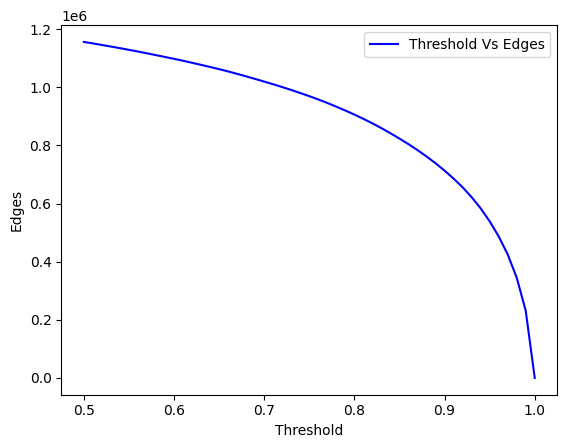

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

start = 0.5
end = 1.0
step = 0.01

threshold = []
degree = []

# Use tqdm to show a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)

    # Create an empty list to store the edges
    edges = []

    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)):
            weight = correlation_matrix.iloc[i, j]  # Access the correlation using .iloc
            if abs(weight) >= t:
                edges.append([i, j, weight])

    x = len(edges)
    degree.append(x)

# Plot the data
plt.plot(threshold, degree, label='Threshold Vs Edges', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Edges')

# Add a legend
plt.legend()
plt.show()


Processing Thresholds: 100%|██████████| 51/51 [1:00:18<00:00, 70.96s/it]


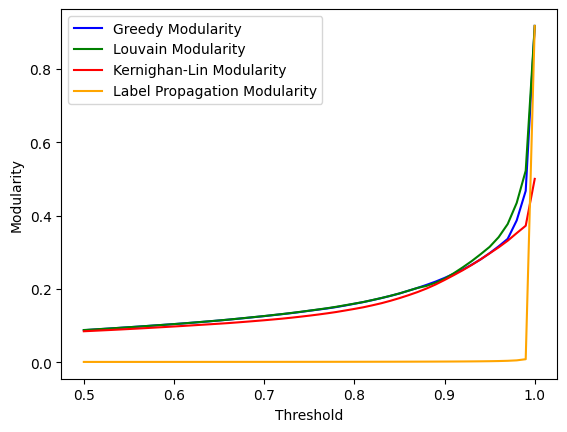

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

start = 0.5
end = 1.0
step = 0.01

threshold = []
modularity_greedy = []
modularity_louvain = []
modularity_kernighan_lin = []
#modularity_k_clique = []
modularity_label_propagation = []

# Use tqdm to wrap the outer loop for a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)
    company_names = correlation_matrix.columns.tolist()

    # Create an empty list to store the edges
    edges = []

    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(len(company_names)):
        for j in range(i, len(company_names)):
            from_edge = company_names[i]
            to_edge = company_names[j]
            weight = correlation_matrix.iloc[i, j]
            if abs(weight) >= t:
                edges.append([from_edge, to_edge, weight])

    # Create a DataFrame from the edges list
    edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

    # Create an empty graph
    G = nx.Graph()

    # Iterate over the edge list and add nodes and weighted edges to the graph
    for row in edge_list.itertuples():
        source = row.Source
        target = row.Target
        weight = row.Weight
        G.add_node(source)
        G.add_node(target)
        G.add_edge(source, target, weight=weight)

    # Greedy Modularity
    communities_greedy = list(nx.community.greedy_modularity_communities(G))
    modularity_greedy.append(nx.community.modularity(G, communities_greedy))

    # Louvain Modularity
    communities_louvain = list(nx.community.louvain_communities(G))
    modularity_louvain.append(nx.community.modularity(G, communities_louvain))

    # Kernighan-Lin Modularity
    communities_kernighan_lin = nx.community.kernighan_lin_bisection(G)
    modularity_kernighan_lin.append(nx.community.modularity(G, [set(communities_kernighan_lin[0]), set(communities_kernighan_lin[1])]))

    # # k-clique Modularity
    # communities_k_clique = list(nx.community.k_clique_communities(G, 3))  # Adjust the clique size
    # modularity_k_clique.append(nx.community.modularity(G, communities_k_clique))

    # Label Propagation Modularity
    communities_label_propagation = list(nx.community.label_propagation_communities(G))
    modularity_label_propagation.append(nx.community.modularity(G, communities_label_propagation))

# Plot the data
plt.plot(threshold, modularity_greedy, label='Greedy Modularity', color='blue')
plt.plot(threshold, modularity_louvain, label='Louvain Modularity', color='green')
plt.plot(threshold, modularity_kernighan_lin, label='Kernighan-Lin Modularity', color='red')
#plt.plot(threshold, modularity_k_clique, label='k-clique Modularity', color='purple')
plt.plot(threshold, modularity_label_propagation, label='Label Propagation Modularity', color='orange')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Modularity')

# Add a legend
plt.legend()
plt.show()


In [ ]:
import networkx as nx
# Create an empty graph
G = nx.Graph()

# Iterate over the edge list and add nodes and weighted edges to the graph
for row in edge_list.itertuples():
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight)

communities_generator = nx.community.louvain_communities(G)
communities_l = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities_l)
print("Modularity:", modularity)
print("Number of Communities:", len(communities_l))

Modularity: 0.43348729772325867
Number of Communities: 7


In [ ]:
for i, community in enumerate(communities_l):
  print(f"Community {i + 1}:",len(community))

Community 1: 342
Community 2: 377
Community 3: 273
Community 4: 137
Community 5: 1
Community 6: 1
Community 7: 1


Processing Thresholds: 100%|██████████| 51/51 [44:21<00:00, 52.19s/it]


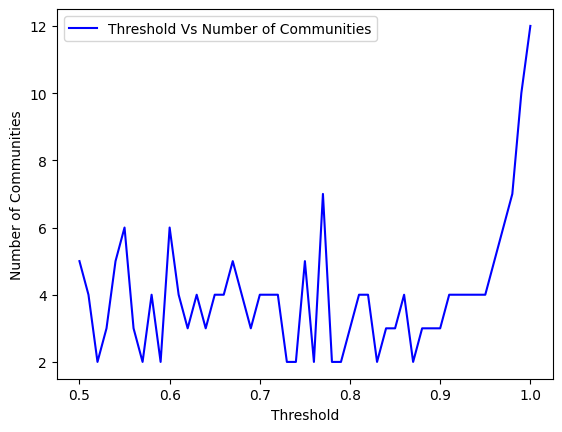

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

start = 0.5
end = 1.0
step = 0.01

threshold = []
num_communities = []

# Use tqdm to wrap the outer loop for a progress bar
for t in tqdm(np.arange(start, end + step, step), desc="Processing Thresholds"):
    threshold.append(t)
    company_names = correlation_matrix.columns.tolist()

    # Create an empty list to store the edges
    edges = []

    # Iterate over the correlation matrix and extract the edges based on the threshold
    for i in range(len(company_names)):
        for j in range(len(company_names)):
            from_edge = company_names[i]
            to_edge = company_names[j]
            weight = correlation_matrix.iloc[i, j]
            if abs(weight) >= t:
                edges.append([from_edge, to_edge, weight])

    # Create a DataFrame from the edges list
    edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

    # Create an empty graph
    G = nx.Graph()

    # Iterate over the edge list and add nodes and weighted edges to the graph
    for row in edge_list.itertuples():
        source = row.Source
        target = row.Target
        weight = row.Weight
        G.add_node(source)
        G.add_node(target)
        G.add_edge(source, target, weight=weight)

    # Louvain Modularity
    communities_generator = nx.community.louvain_communities(G)
    communities_l = list(communities_generator)  # Get the list of communities
    num_communities.append(len(communities_l))

# Plot the data
plt.plot(threshold, num_communities, label='Threshold Vs Number of Communities', color='blue')

# Add labels for the x and y axes
plt.xlabel('Threshold')
plt.ylabel('Number of Communities')

# Add a legend
plt.legend()
plt.show()


In [ ]:
# Modularity
communities_generator = nx.community.girvan_newman(G)
communities = list(communities_generator)  # Get the first partition

if communities is not None and len(communities) > 0:
    modularity = nx.community.modularity(G, communities)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities))
else:
    print("No valid partition found.")


In [ ]:
import networkx as nx

# Get the greedy modularity communities
communities_generator = nx.community.greedy_modularity_communities(G)
communities = list(communities_generator)  # Get the list of communities

if communities:
    modularity = nx.community.modularity(G, communities)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))

    # Print values in each community
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


Modularity: 0.38677022013771706
Number of Communities: 6
Community 1: 556
Community 2: 437
Community 3: 136
Community 4: 1
Community 5: 1
Community 6: 1


In [ ]:
# Modularity
communities_generator = nx.community.label_propagation_communities(G)
communities =list(communities_generator)  # Get the first partition

if communities is not None:
    modularity = nx.community.modularity(G, communities_generator)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


In [ ]:
# Modularity
communities_generator = nx.community.kernighan_lin_bisection(G)
communities =list(communities_generator)  # Get the first partition

if communities is not None:
    modularity = nx.community.modularity(G, communities_generator)
    print("Modularity:", modularity)
    print("Number of Communities:", len(communities_generator))
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {len(community)}")
else:
    print("No valid partition found.")


In [ ]:
# Calculate network science parameters
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)
print("Company with Maximum Degree Centrality:")
print("Company Name:", max_degree_node)
print("Degree Centrality:", degree_centrality[max_degree_node])
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
print("Company with Maximum Betweenness Centrality:")
print("Company Name:", max_betweenness_node)
print("Betweenness Centrality:", betweenness_centrality[max_betweenness_node])

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
print("Company with Maximum Closeness Centrality:")
print("Company Name:", max_closeness_node)
print("Closeness Centrality:", closeness_centrality[max_closeness_node])

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Company with Maximum Eigenvector Centrality:")
print("Company Name:", max_eigenvector_node)
print("Eigenvector Centrality:", eigenvector_centrality[max_eigenvector_node])

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
max_clustering_node = max(clustering_coefficient, key=clustering_coefficient.get)
print("Company with Maximum Clustering Coefficient:")
print("Company Name:", max_clustering_node)
print("Clustering Coefficient:", clustering_coefficient[max_clustering_node])


Company with Maximum Degree Centrality:
Company Name: Knowledge Marine & Engineering Works Limited
Degree Centrality: 0.4361702127659574
Company with Maximum Betweenness Centrality:
Company Name: GE Power India Limited
Betweenness Centrality: 0.008350698112113458
Company with Maximum Closeness Centrality:
Company Name: Himatsingka Seide Ltd.,
Closeness Centrality: 0.44114196323816973
Company with Maximum Eigenvector Centrality:
Company Name: Ultramarine & Pigments Ltd.,
Eigenvector Centrality: 0.0511177332008166
Company with Maximum Clustering Coefficient:
Company Name: Somany Ceramics Limited
Clustering Coefficient: 1.0


Community 1:
Lead Node: KPI Green Energy Limited, Degree Centrality: 0.9033232628398792
Lag Node: CreditAccess Grameen Ltd., Degree Centrality: 0.20241691842900303

Community 2:
Lead Node: Magadh Sugar & Energy Limited, Degree Centrality: 0.8891891891891892
Lag Node: Choice International Ltd, Degree Centrality: 0.22702702702702704

Community 3:
Lead Node: Nucleus Software Exports Ltd, Degree Centrality: 0.7692307692307693
Lag Node: Fairchem Organics Limited, Degree Centrality: 0.16346153846153846

Community 4:
Lead Node: NGL Fine Chem Ltd., Degree Centrality: 0.6234567901234568
Lag Node: Bajaj Electricals Ltd.,, Degree Centrality: 0.1450617283950617

Modularity: 0.23991567944955225
Number of Communities: 4


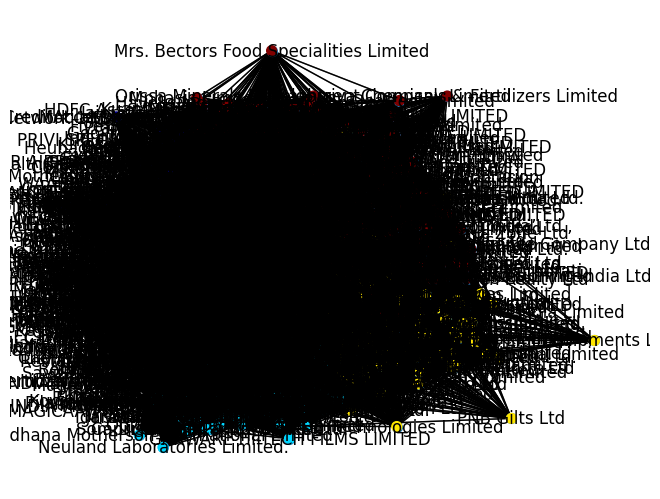

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

communities_generator = nx.community.louvain_communities(G)
communities = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities)
# Create a mapping of nodes to communities
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

# Extract positions of nodes in the graph
pos = nx.spring_layout(G)

# Create a custom color map for communities
num_communities = len(communities)
cmap = plt.get_cmap('jet', num_communities)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw nodes with colors based on communities using the custom color map
node_colors = [community_mapping[node] for node in G.nodes()]
node_color_values = [cmap(i) for i in node_colors]
nx.draw_networkx_nodes(G, pos, node_color=node_color_values, node_size=50)

# Add a legend
legend_labels = {community_id: f"Community {community_id}" for community_id in set(community_mapping.values())}

# Compute degree centrality for each community
for community_id, community in enumerate(communities):
    community_subgraph = G.subgraph(community)

    # Compute degree centrality
    degree_centrality = nx.degree_centrality(community_subgraph)

    # Find lead and lag nodes based on degree centrality
    lead_node = max(degree_centrality, key=degree_centrality.get)
    lag_node = min(degree_centrality, key=degree_centrality.get)

    print(f"Community {community_id + 1}:")
    print(f"Lead Node: {lead_node}, Degree Centrality: {degree_centrality[lead_node]}")
    print(f"Lag Node: {lag_node}, Degree Centrality: {degree_centrality[lag_node]}")
    print()

# Print the modularity and the number of communities
print("Modularity:", modularity)
print("Number of Communities:", num_communities)

# Save the graph as a Gephi file
nx.write_graphml(G, "graph.gephi.graphml")


Community 1 (332 nodes): ['HMT Limited', 'Nestle India Ltd.', 'Hatsun Agro Products Ltd.', 'MAN INFRACONSTRUCTION LIMITED', 'Chambal Fertilisers & Chemicals Ltd', 'Shankara Building Products Limited', 'Cyient Limited', 'Jubilant Ingrevia Limited', 'Bombay Dyeing & Mfg. Co. Ltd.,', 'IFCI Ltd.', 'Fine Organic Industries Limited', 'Steel Strips & Wheels Ltd', 'GIC Housing Finance Ltd.', 'Birla Corporation Ltd.', 'PG Electroplast Limited', 'AIA Engineering Ltd.', 'TV18 Broadcast Ltd.', 'Adani Enterprises Ltd.', 'YASHO INDUSTRIES LIMITED', 'Alkem Laboratories Limited', 'HealthCare Global Enterprises Limited', 'Star Health and Allied Insurance Company Limited', 'HITACHI ENERGY INDIA LIMITED', 'Radico Khaitan Ltd.', 'Network 18 Media & Investments Limited', 'Ion Exchange (India) Ltd', 'Anupam Rasayan India Limited', 'Gail (India) Ltd.', 'PC JEWELLER LIMITED', 'Mahanagar Telephone Nigam Ltd.', 'PSP Projects Limited', 'United Breweries Ltd.', 'Ajmera Realty & Infra India Limited', 'PRIVI SPECIA

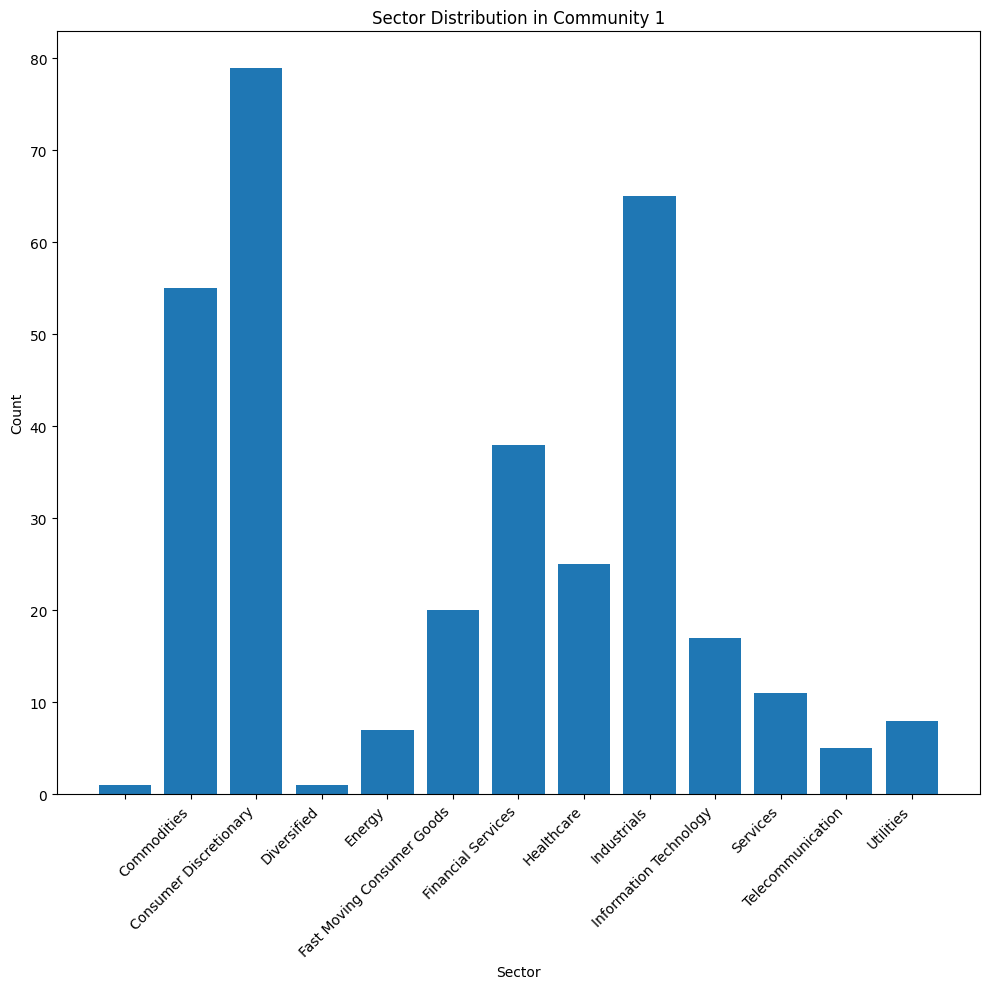


Community 2 (371 nodes): ['Mahindra Lifespace Developers Ltd.', 'Pilani Investment And Industries Corporation Limited', 'Sindhu Trade Links Limited', 'AAVAS Financiers Limited', 'Krishna Institute of Medical Sciences Limited', 'Indraprastha Medical Corporation Lt', 'Vesuvius India Ltd.', 'TD Power Systems Ltd', 'Indian Hotels Co. Ltd', 'Heranba Industries Limited', 'Manappuram Finance Limited', 'ANDHRA PAPER LIMITED', 'Hindware Home Innovation Limited', 'Lic Housing Finance Ltd.', 'Adani Power Limited', 'Apar Industries Ltd', 'GTPL Hathway Limited', 'Precision Camshafts Limited', 'Subex  Ltd', 'Vascon Engineers Limited', "Venky's (India) ltd.", 'Thomas Cook (India) Ltd.,', 'Samvardhana Motherson International Limited', 'Wendt (India) Ltd.,', 'WPIL Ltd', 'TATA STEEL LONG PRODUCTS LIMITED', 'SUNDARAM FINANCE LTD', 'PDS LIMITED', 'Zee Media Corporation Limited', 'Metro Brands Limited', 'Dollar Industries Limited', 'KDDL Ltd', 'Mishra Dhatu Nigam Limited', 'Ajanta Pharma Ltd.', 'KMC Speci

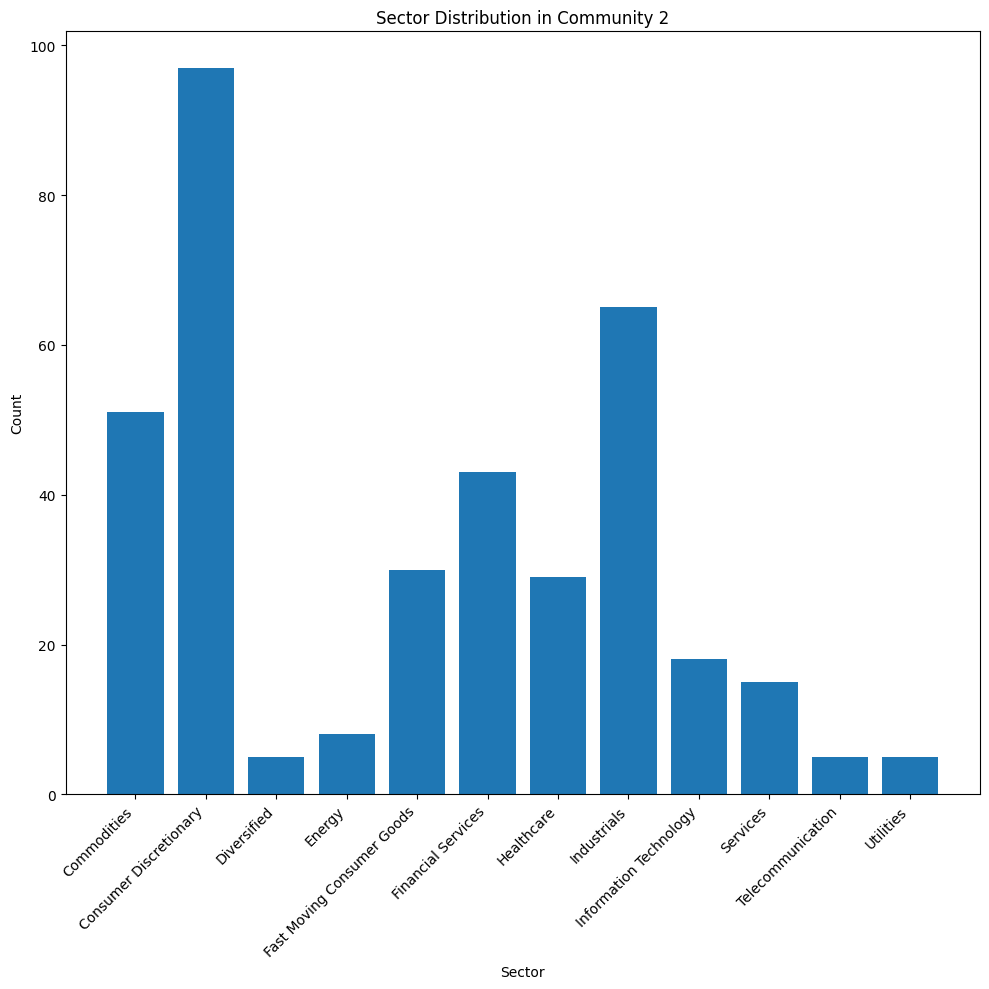


Community 3 (105 nodes): ['Star Cement Limited', 'Fairchem Organics Limited', 'Welspun Corp Limited', 'Varroc Engineering Limited', 'The New India Assurance Company Limited', 'CIE Automotive India Limited', 'Aditya Birla Capital Ltd', 'Taj GVK Hotels & Resorts Ltd.', 'WESTLIFE FOODWORLD LIMITED', 'Nucleus Software Exports Ltd', 'Vardhman Textiles Limted', 'TCPL Packaging Limited', 'Deepak Fertilizers &Petrochemicals', 'RattanIndia Power Limited', 'Panama Petrochem Ltd.', 'Centum Electronics Ltd', 'CG Power and Industrial Solutions Limited', 'The Anup Engineering Ltd', 'SUMMIT SECURITIES LTD.', 'Shivalik Rasayan Ltd.', 'V.S.T.Tillers Tractors Ltd.', 'Salasar Techno Engineering Limited', 'Nuvoco Vistas Corporation Limited', 'Ami Organics Limited', 'DCB Bank Limited', 'UPL Limited', 'Cipla Ltd.,', 'GRM Overseas Ltd.', 'Sarda Energy & Minerals Ltd', 'KFin Technologies Limited', 'Hinduja Global Solutions Limited', 'Subros Ltd.,', 'Kajaria Ceramics Ltd', 'Precision Wires India ltd.,', 'Torr

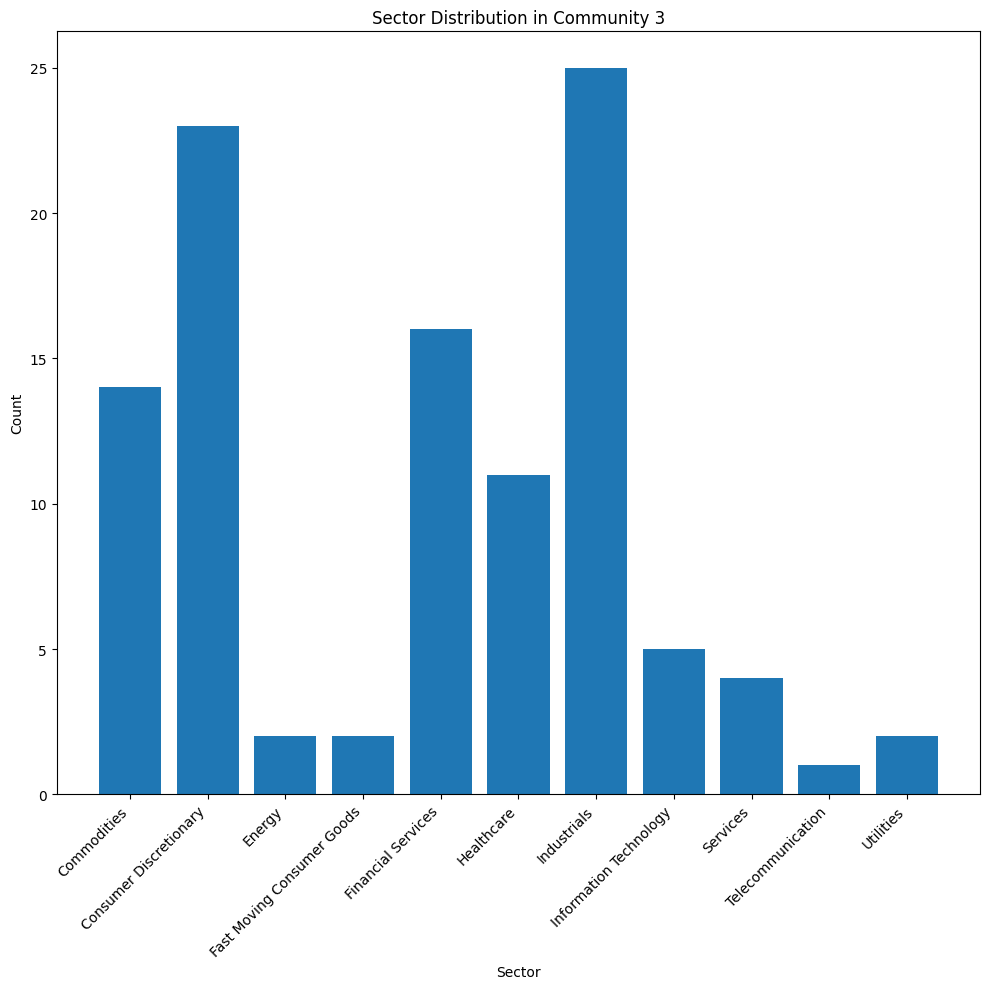


Community 4 (325 nodes): ['Balrampur Chini Mills Ltd.', 'Arman Financial Services Limited', 'Data Patterns (India) Limited', 'Kalyani Investment Company Limited', 'Sigachi Industries Limited', 'Action Construction Equipments Ltd.', 'Eveready Industries India Ltd.', 'InfoBeans Technologies Limited', 'Kesoram Industries Ltd', 'Kirloskar Pneumatic Co.Ltd.', 'Sudarshan Chemical Indus. Ltd.,', 'HLE GLASCOAT LIMITED', 'Gujarat Narmada Valley Fert.Co.Ltd', 'Jaiprakash Power Ventures Limited', 'Finolex Cables Ltd.,', 'TeamLease Services Limited', 'Astra Microwave Products Ltd.', 'HDFC Asset Management Company Limited', 'Jaiprakash Associates Limited', 'Syrma SGS Technology Limited', 'DREAMFOLKS SERVICES LIMITED', 'Swaraj Engines Ltd.', 'ITC Ltd', 'ITD Cementation India Ltd', 'Dhunseri Ventures Limited', 'ADANI TOTAL GAS LIMITED', 'Marathon Nextgen Realty Ltd', 'Parag Milk Foods Limited', 'TATA CONSUMER PRODUCTS LIMITED', 'Mazagon Dock Shipbuilders Limited', 'Suryoday Small Finance Bank Limite

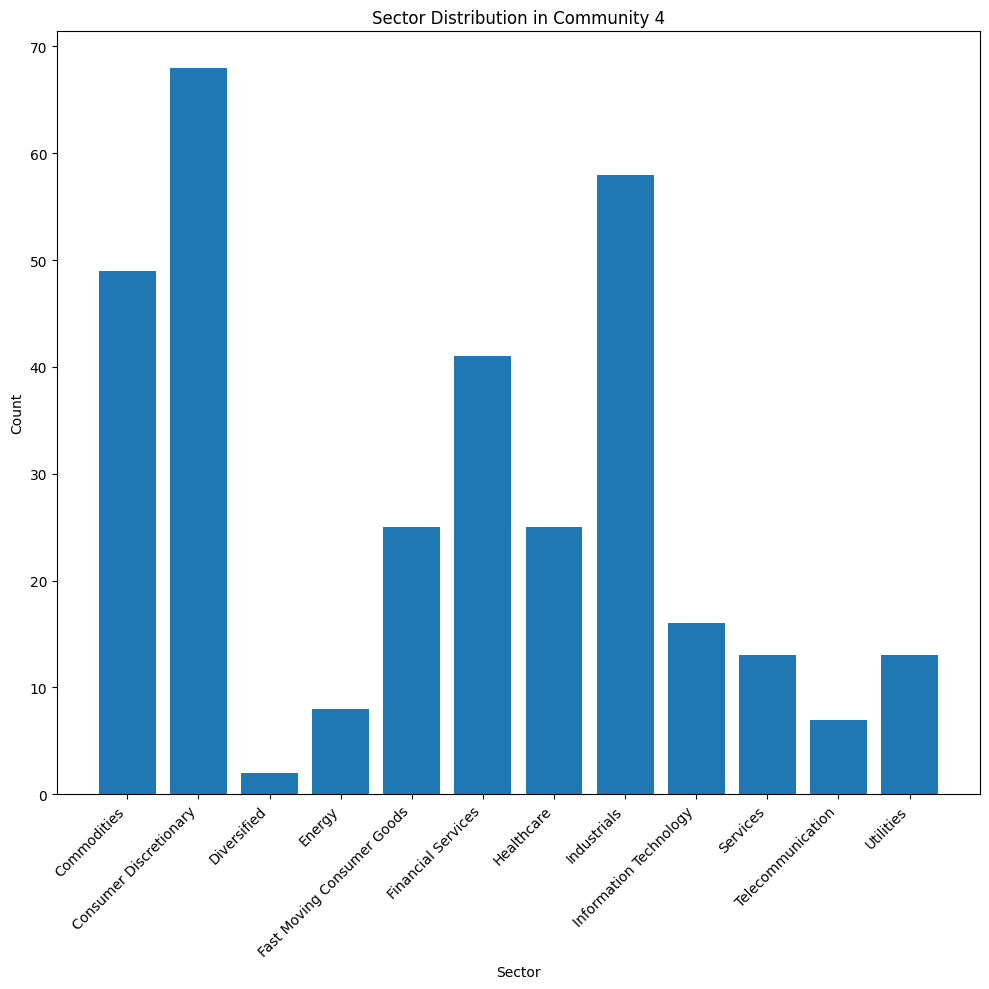

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have communities obtained using greedy_modularity_communities
# communities = list(nx.community.greedy_modularity_communities(G))

# Function to find unique sectors within a community
def find_unique_sectors(community):
    unique_sectors = set()
    for comm in list(community):
        sectors = ', '.join(merged_df.loc[merged_df['Issuer Name'] == comm, 'Sector Name'].unique())
        unique_sectors.add(sectors)
    return unique_sectors

# Plot bar graphs for sector distribution within each community
for i, community in enumerate(communities):
    unique_sectors = find_unique_sectors(community)
    print(f"Community {i + 1} ({len(community)} nodes): {list(community)}")
    print(f"Unique Sectors: {unique_sectors}")

    # Count occurrences of each sector within the community
    sector_counts = {}
    for comm in list(community):
        sectors = ', '.join(merged_df.loc[merged_df['Issuer Name'] == comm, 'Sector Name'].unique())
        # print(sectors)
        if sectors not in sector_counts:
            sector_counts[sectors] = 1
        else:
            sector_counts[sectors] += 1

    # Sort the sector counts by sector name
    sorted_sector_counts = dict(sorted(sector_counts.items()))

    # Increase figure size
    plt.figure(figsize=(10, 10))

    # Plot the bar graph
    plt.bar(sorted_sector_counts.keys(), sorted_sector_counts.values())
    plt.xlabel('Sector')
    plt.ylabel('Count')
    plt.title(f'Sector Distribution in Community {i + 1}')
    plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    print()


In [ ]:
# Function to find sub-communities within a given community
def find_sub_communities(community, G):
    subgraph = G.subgraph(community)
    sub_communities = list(nx.community.louvain_communities(subgraph))
    return sub_communities

# Find sub-communities for each community
all_sub_communities = []
for i, community in enumerate(communities):
    sub_communities = find_sub_communities(community, G)
    all_sub_communities.append(sub_communities)

    print(f"Sub-Communities for Community {i + 1} (Total {len(community)} nodes):")
    for j, sub_community in enumerate(sub_communities):
        print(f"Sub-Community {j + 1} ({len(sub_community)} nodes): {list(sub_community)}")

Sub-Communities for Community 1 (Total 332 nodes):
Sub-Community 1 (95 nodes): ['Hercules Hoists Ltd.,', 'Sequent Scientific Limited', 'Elantas Beck India Ltd', 'Force Motors Limited', 'DCM Shriram Limited', 'Kama Holdings Limited', 'Pearl Global Industries Limited', 'PETRONET LNG LTD.', 'Mayur Uniquoters ltd.', 'Steel Strips & Wheels Ltd', 'Monarch Networth Capital Limited', 'GIC Housing Finance Ltd.', 'PG Electroplast Limited', 'TV18 Broadcast Ltd.', 'Star Health and Allied Insurance Company Limited', 'HITACHI ENERGY INDIA LIMITED', 'Jammu and Kashmir Bank Ltd.', 'Hawkins Cooker Ltd.', 'KSB LIMITED', 'Genus Power Infrastructures Ltd', 'Xpro India Ltd.', 'PSP Projects Limited', 'PROCTER & GAMBLE HEALTH LIMITED', 'Texmaco Rail & Engineering Limited', 'KEC International Ltd.', 'United Breweries Ltd.', 'Venus Pipes & Tubes Limited', 'PRIVI SPECIALITY CHEMICALS LIMITED', 'TCNS Clothing Co. Limited', 'TVS Holdings Limited', 'Seamec Ltd', 'Poly Medicure Ltd', 'LLOYDS ENGINEERING WORKS LIMIT

In [ ]:
# Function to find sub-communities within a given community
def find_sub_communities(community, G):
    subgraph = G.subgraph(community)
    sub_communities = list(nx.community.louvain_communities(subgraph))
    return sub_communities

# Find sub-communities for each community
all_sub_communities = []
for i, community in enumerate(communities):
    sub_communities = find_sub_communities(community, G)
    all_sub_communities.append(sub_communities)

    print(f"Sub-Communities for Community {i + 1} (Total {len(community)} nodes):")
    for j, sub_community in enumerate(sub_communities):
        unique_sectors = set()
        sec = {}
        print(f"Sub-Community {j + 1} ({len(sub_community)} nodes): {list(sub_community)}")
        for comm in list(sub_community):
            sectors = ', '.join(data.loc[data['Issuer Name'] == comm, 'Sector'].unique())
            #print(sectors)
            if sectors not in sec:
                sec[sectors] = 1
            else:
                sec[sectors] += 1
            unique_sectors.add(sectors)
        print("Unique Sectors:", unique_sectors)
        print("Sectors:", sec)


Sub-Communities for Community 1 (Total 332 nodes):
Sub-Community 1 (85 nodes): ['Ashoka Buildcon Limited', 'JUBILANT PHARMOVA LIMITED', 'Galaxy Surfactants Limited', 'Aarti Drugs Limited', 'EIH Ltd', 'Cyient Limited', 'Kingfa Science & Technology (India) Ltd', 'Jindal Worldwide Ltd.', 'ASTEC LIFESCIENCES LIMITED', 'Jagran Prakashan Limited', 'Onward Technologies Ltd.', 'Chemplast Sanmar Limited', 'Piccadily Agro Industries ltd.', 'Birla Corporation Ltd.', 'AIA Engineering Ltd.', 'Bigbloc Construction Limited', 'Alkem Laboratories Limited', 'NBCC (India) Limited', 'National Aluminium Co. Ltd.,', 'HITACHI ENERGY INDIA LIMITED', 'Alkyl Amines Chemicals Ltd.,', 'Ion Exchange (India) Ltd', 'BF Utilities Ltd.', 'Cupid Limited', 'Mahindra Logistics Limited', 'Gail (India) Ltd.', 'Anupam Rasayan India Limited', 'Greenpanel Industries Limited', 'PC JEWELLER LIMITED', 'Mahanagar Telephone Nigam Ltd.', 'MMTC Ltd.,', 'CANTABIL RETAIL INDIA LIMITED', 'Bharat Bijlee Ltd.,', 'MAS Financial Services L

Community 1 (333 nodes): ['HMT Limited', 'Nestle India Ltd.', 'Hatsun Agro Products Ltd.', 'MAN INFRACONSTRUCTION LIMITED', 'Chambal Fertilisers & Chemicals Ltd', 'Shankara Building Products Limited', 'Cyient Limited', 'Jubilant Ingrevia Limited', 'Bombay Dyeing & Mfg. Co. Ltd.,', 'IFCI Ltd.', 'Fine Organic Industries Limited', 'Steel Strips & Wheels Ltd', 'GIC Housing Finance Ltd.', 'Birla Corporation Ltd.', 'PG Electroplast Limited', 'TV18 Broadcast Ltd.', 'YASHO INDUSTRIES LIMITED', 'Adani Enterprises Ltd.', 'AIA Engineering Ltd.', 'Alkem Laboratories Limited', 'HealthCare Global Enterprises Limited', 'Star Health and Allied Insurance Company Limited', 'HITACHI ENERGY INDIA LIMITED', 'Radico Khaitan Ltd.', 'Network 18 Media & Investments Limited', 'Ion Exchange (India) Ltd', 'Hinduja Global Solutions Limited', 'Anupam Rasayan India Limited', 'Gail (India) Ltd.', 'Mahanagar Telephone Nigam Ltd.', 'PSP Projects Limited', 'United Breweries Ltd.', 'Ajmera Realty & Infra India Limited', 

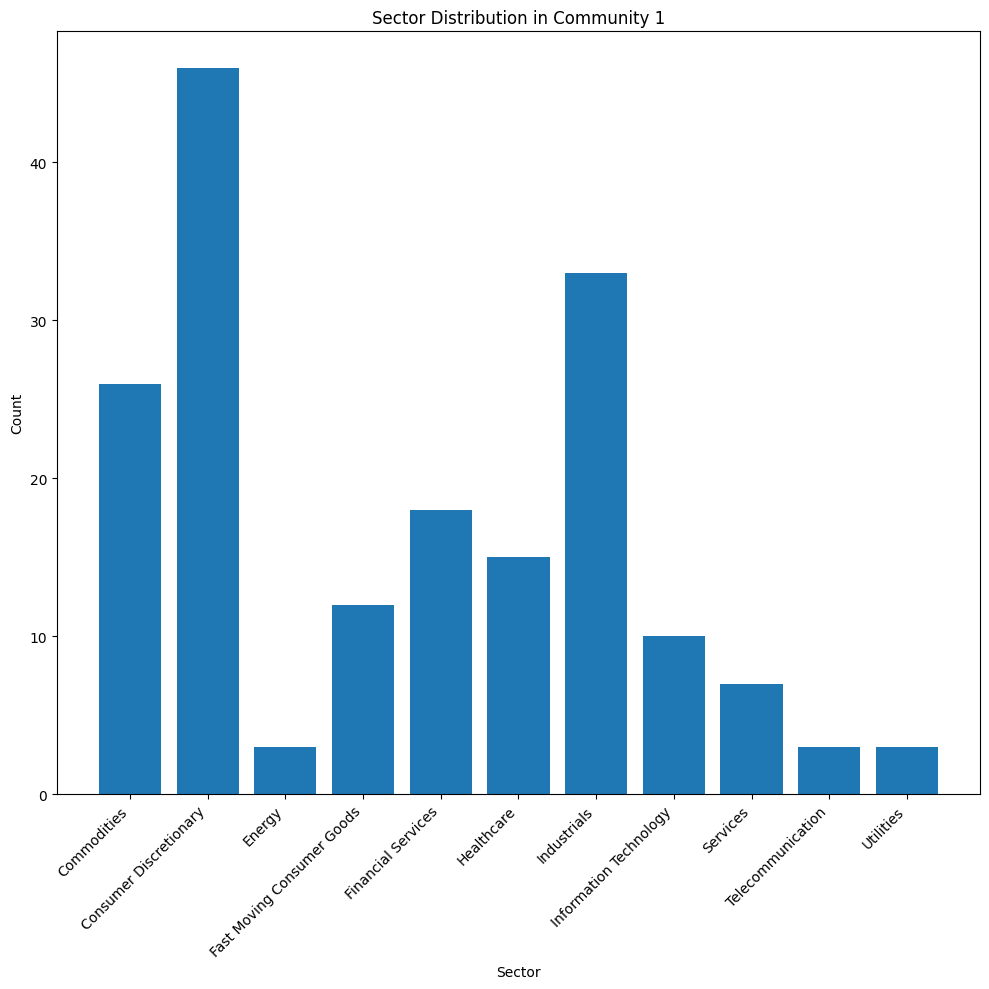

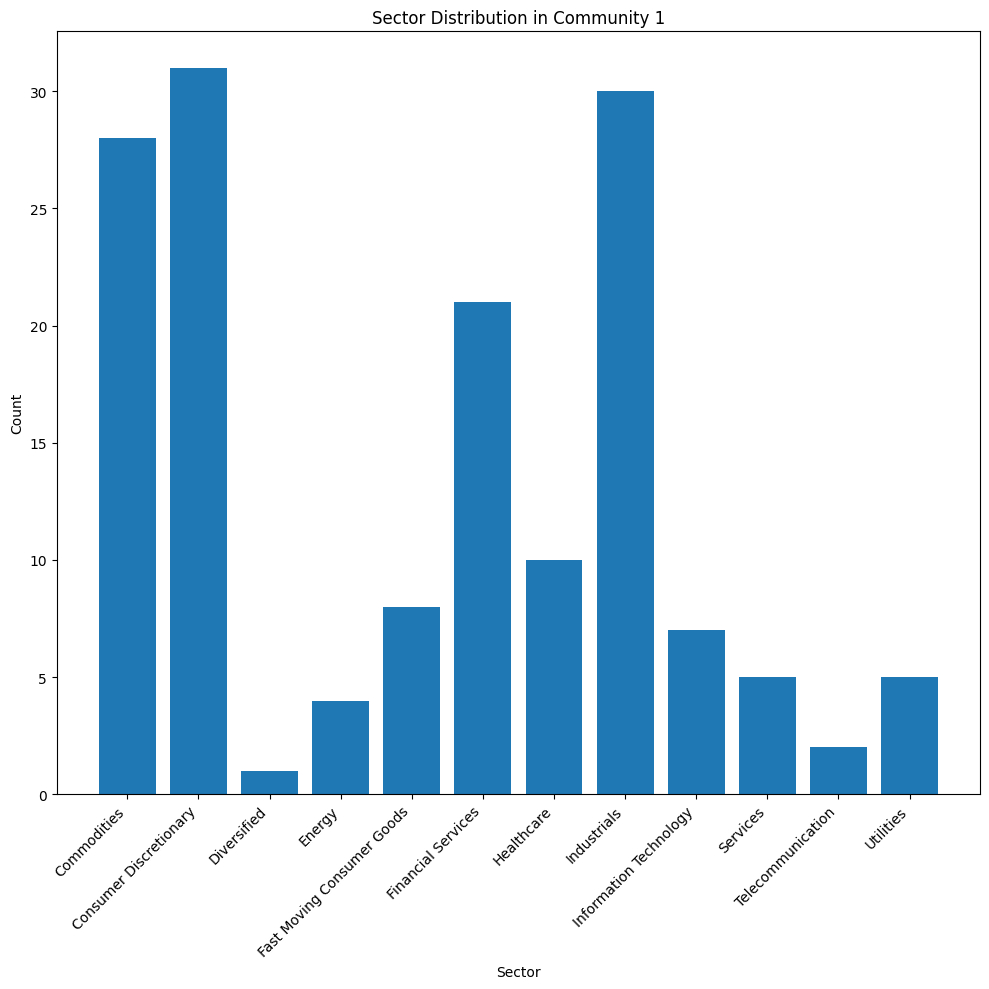

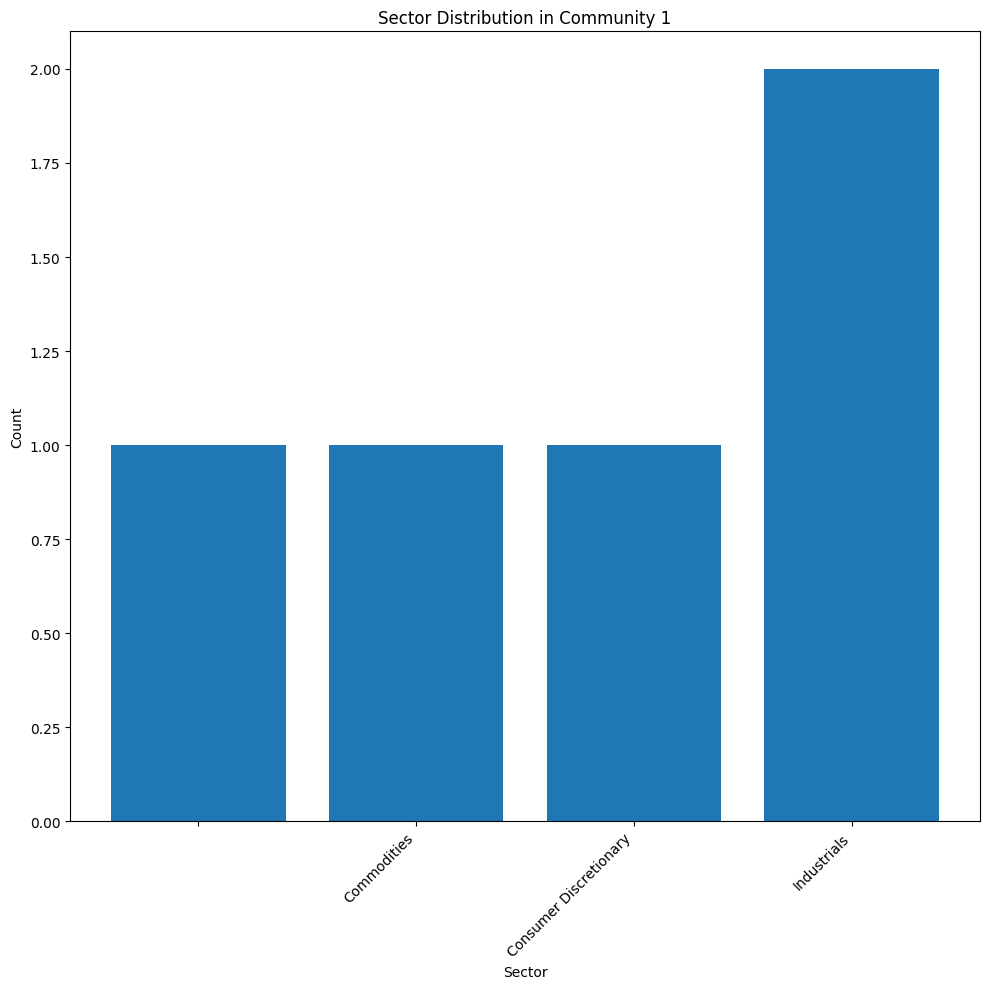


Community 2 (369 nodes): ['Mahindra Lifespace Developers Ltd.', 'Pilani Investment And Industries Corporation Limited', 'Sindhu Trade Links Limited', 'AAVAS Financiers Limited', 'Krishna Institute of Medical Sciences Limited', 'Indian Hotels Co. Ltd', 'Vesuvius India Ltd.', 'Indraprastha Medical Corporation Lt', 'TD Power Systems Ltd', 'Heranba Industries Limited', 'Manappuram Finance Limited', 'ANDHRA PAPER LIMITED', 'Hindware Home Innovation Limited', 'Lic Housing Finance Ltd.', 'Adani Power Limited', 'Apar Industries Ltd', 'GTPL Hathway Limited', 'Vascon Engineers Limited', "Venky's (India) ltd.", 'Subex  Ltd', 'Precision Camshafts Limited', 'Thomas Cook (India) Ltd.,', 'Samvardhana Motherson International Limited', 'Wendt (India) Ltd.,', 'WPIL Ltd', 'TATA STEEL LONG PRODUCTS LIMITED', 'SUNDARAM FINANCE LTD', 'PDS LIMITED', 'Zee Media Corporation Limited', 'Metro Brands Limited', 'KDDL Ltd', 'Dollar Industries Limited', 'Mishra Dhatu Nigam Limited', 'PC JEWELLER LIMITED', 'Ajanta P

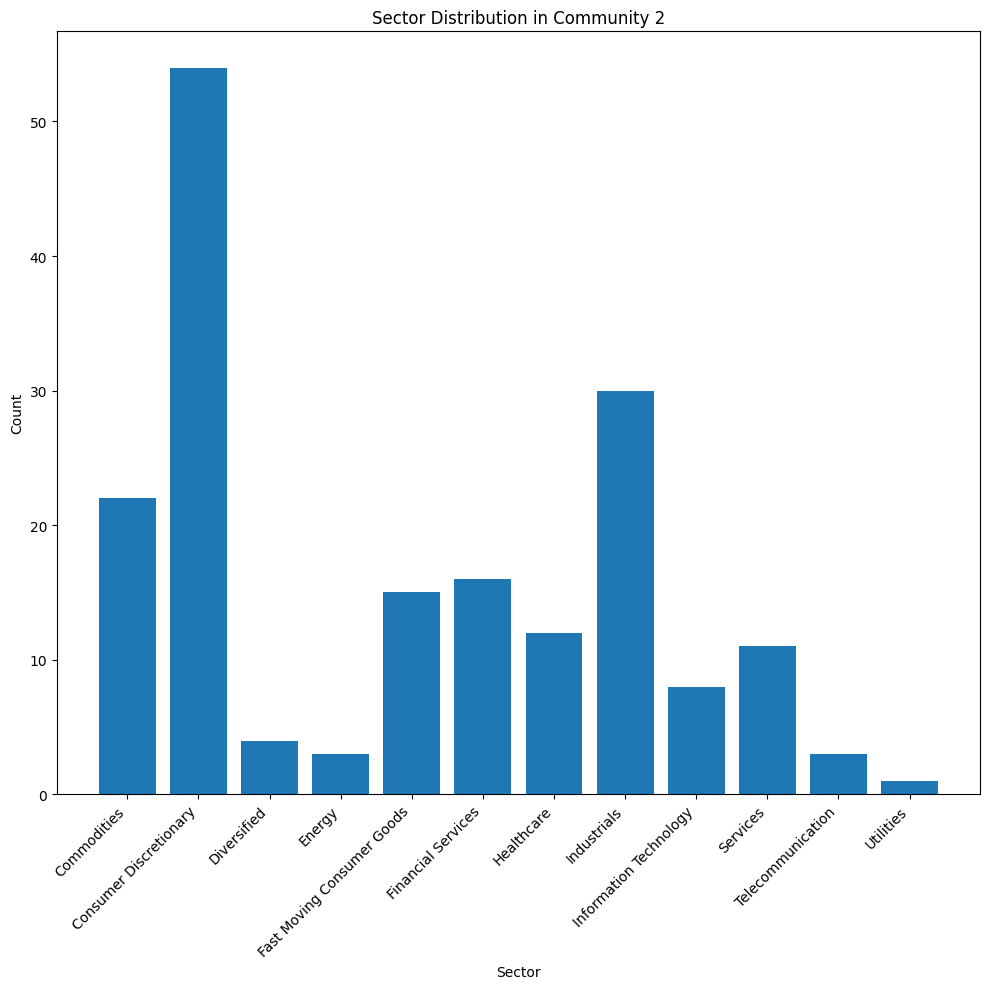

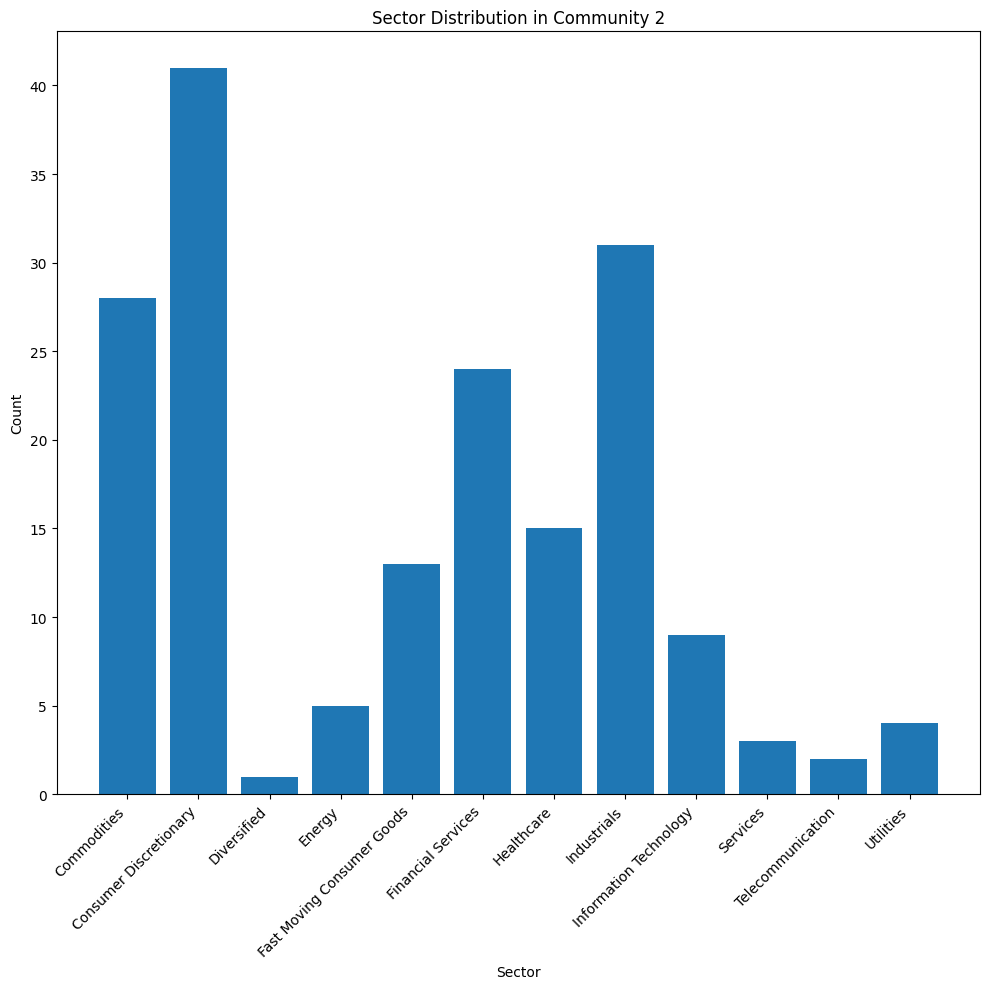

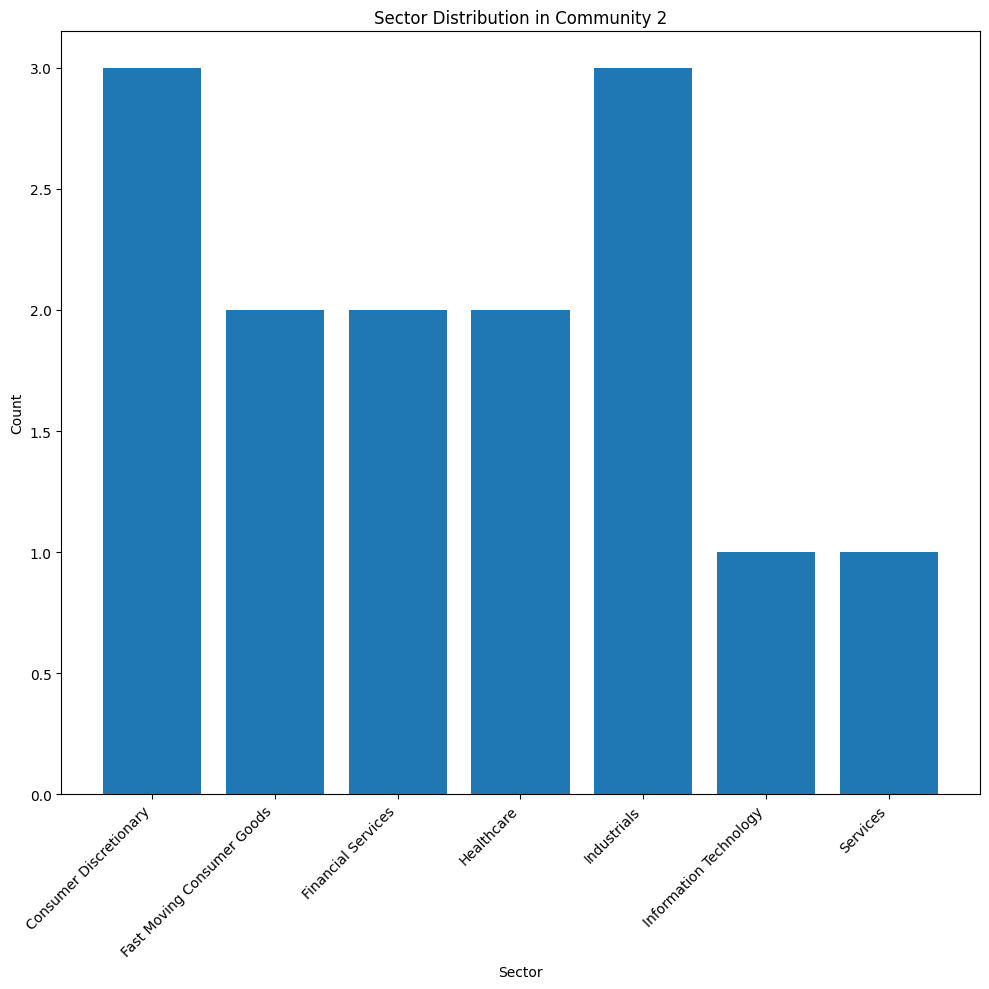


Community 3 (319 nodes): ['Arman Financial Services Limited', 'Balrampur Chini Mills Ltd.', 'Data Patterns (India) Limited', 'Kalyani Investment Company Limited', 'Sigachi Industries Limited', 'Action Construction Equipments Ltd.', 'Eveready Industries India Ltd.', 'InfoBeans Technologies Limited', 'Kesoram Industries Ltd', 'Kirloskar Pneumatic Co.Ltd.', 'Sudarshan Chemical Indus. Ltd.,', 'HLE GLASCOAT LIMITED', 'Gujarat Narmada Valley Fert.Co.Ltd', 'Jaiprakash Power Ventures Limited', 'Finolex Cables Ltd.,', 'TeamLease Services Limited', 'Astra Microwave Products Ltd.', 'HDFC Asset Management Company Limited', 'Jaiprakash Associates Limited', 'Syrma SGS Technology Limited', 'ITC Ltd', 'Swaraj Engines Ltd.', 'DREAMFOLKS SERVICES LIMITED', 'ITD Cementation India Ltd', 'Dhunseri Ventures Limited', 'ADANI TOTAL GAS LIMITED', 'Parag Milk Foods Limited', 'Mazagon Dock Shipbuilders Limited', 'TATA CONSUMER PRODUCTS LIMITED', 'Maharashtra Scooters Ltd.,', 'HEG Ltd.', 'Suryoday Small Finance 

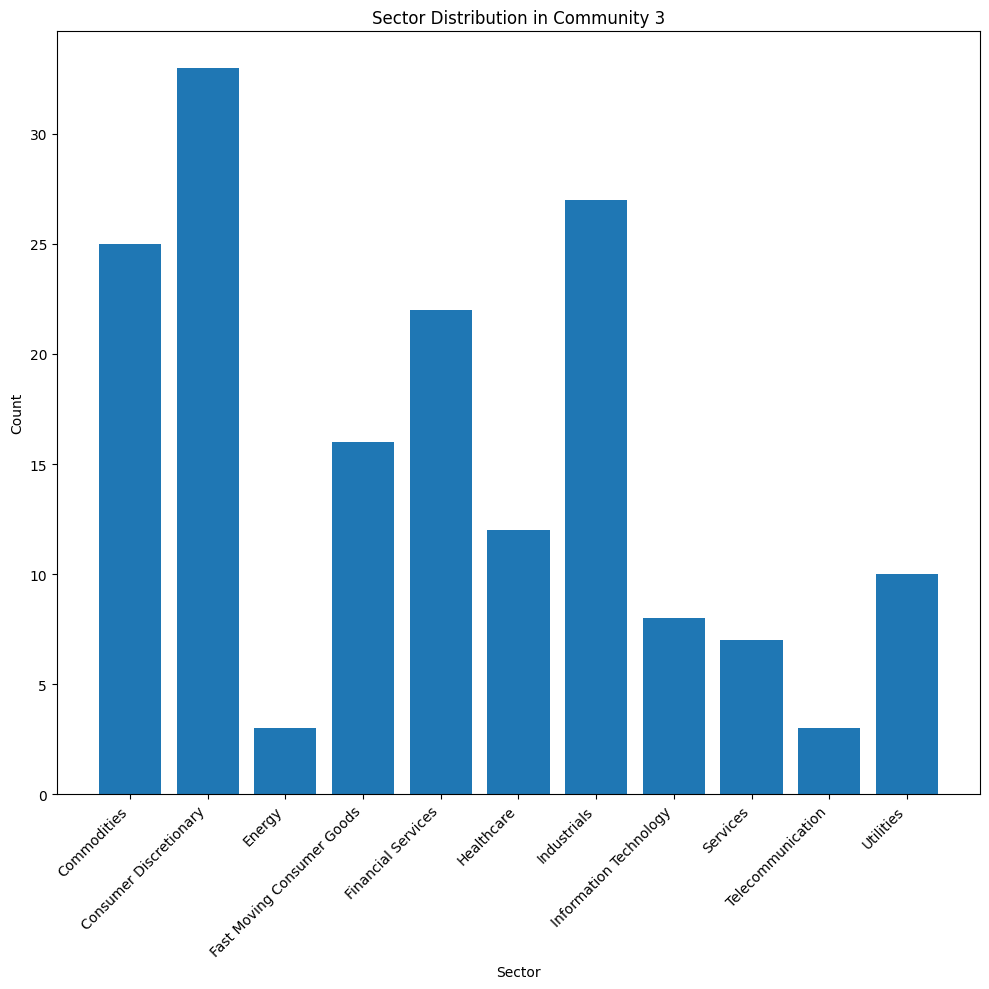

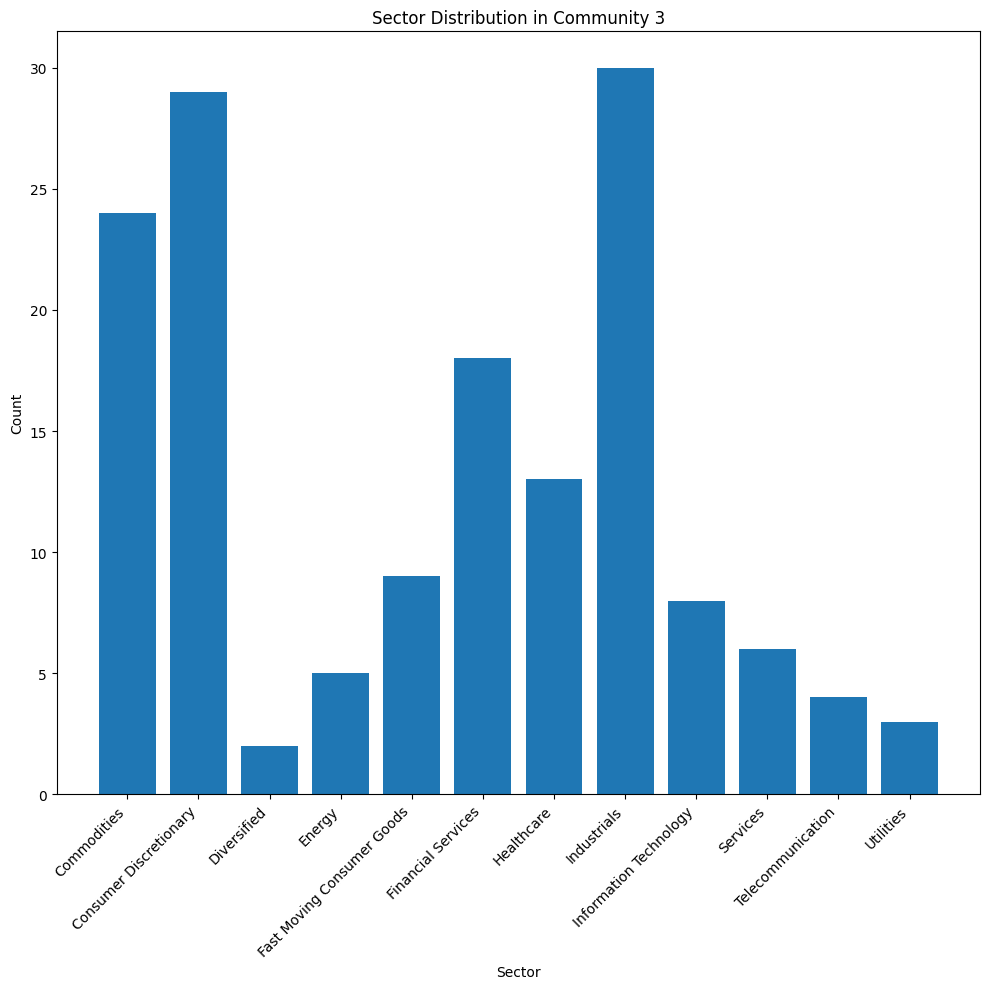

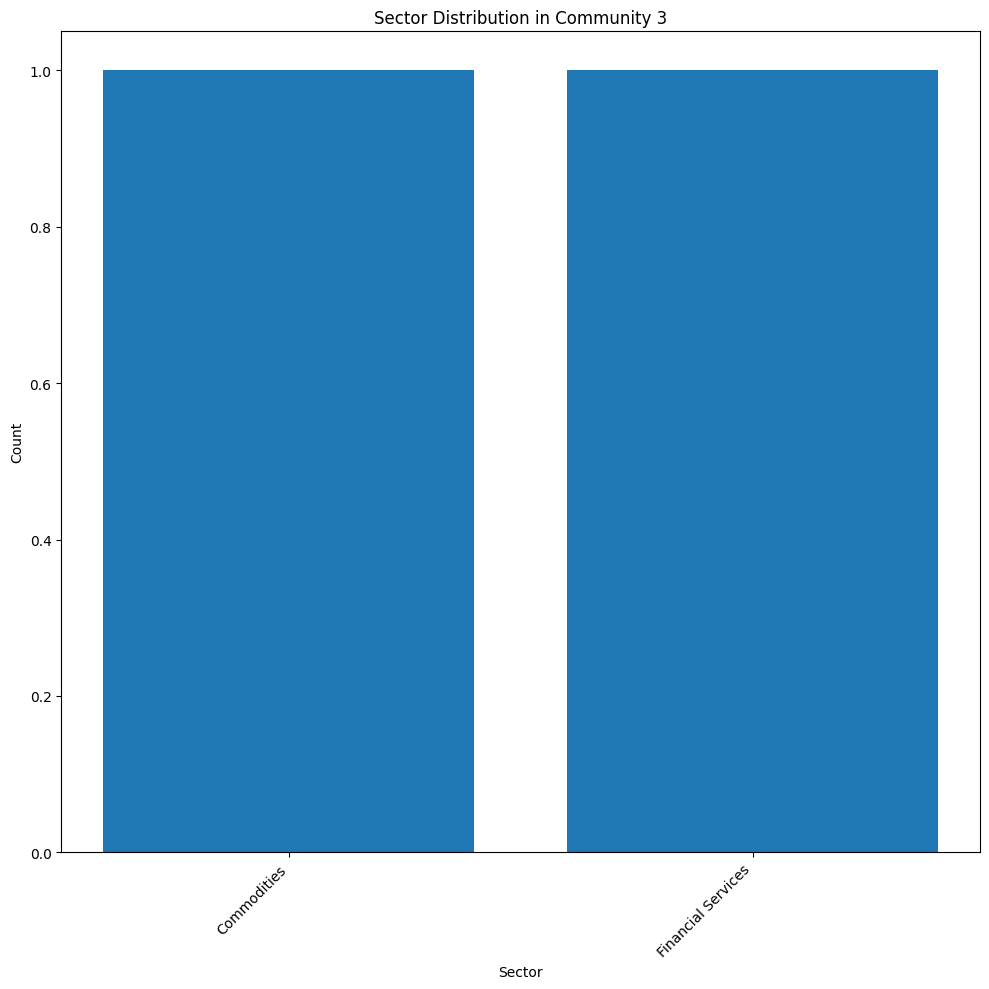


Community 4 (112 nodes): ['Star Cement Limited', 'Fairchem Organics Limited', 'Welspun Corp Limited', 'Varroc Engineering Limited', 'The New India Assurance Company Limited', 'CIE Automotive India Limited', 'Aditya Birla Capital Ltd', 'WESTLIFE FOODWORLD LIMITED', 'Taj GVK Hotels & Resorts Ltd.', 'Nucleus Software Exports Ltd', 'Vardhman Textiles Limted', 'TCPL Packaging Limited', 'Lemon Tree Hotels Limited', 'Deepak Fertilizers &Petrochemicals', 'RattanIndia Power Limited', 'Panama Petrochem Ltd.', 'Centum Electronics Ltd', 'CG Power and Industrial Solutions Limited', 'The Anup Engineering Ltd', 'SUMMIT SECURITIES LTD.', 'Shivalik Rasayan Ltd.', 'V.S.T.Tillers Tractors Ltd.', 'Salasar Techno Engineering Limited', 'Nuvoco Vistas Corporation Limited', 'Ami Organics Limited', 'DCB Bank Limited', 'UPL Limited', 'Bajaj Electricals Ltd.,', 'Cipla Ltd.,', 'GRM Overseas Ltd.', 'Surya Roshni Ltd.,', 'Sarda Energy & Minerals Ltd', 'KFin Technologies Limited', 'Subros Ltd.,', 'Torrent Pharmaceu

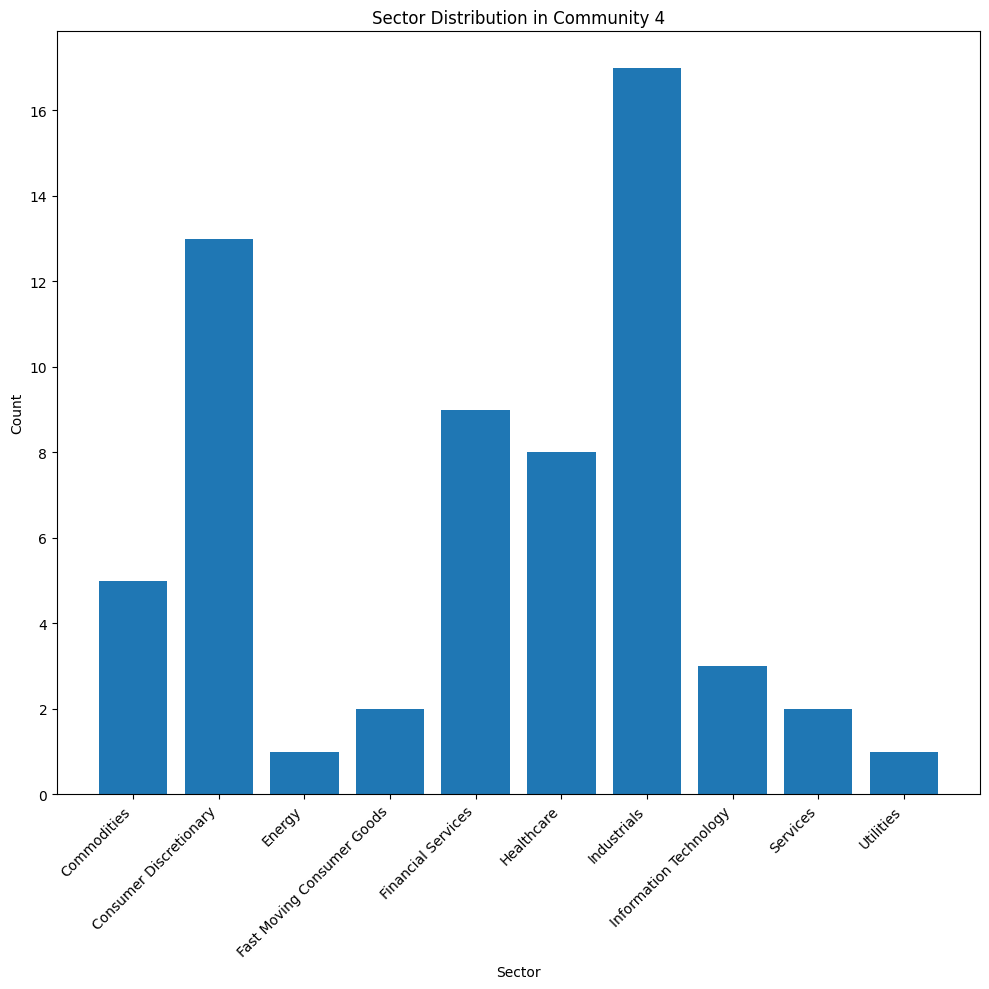

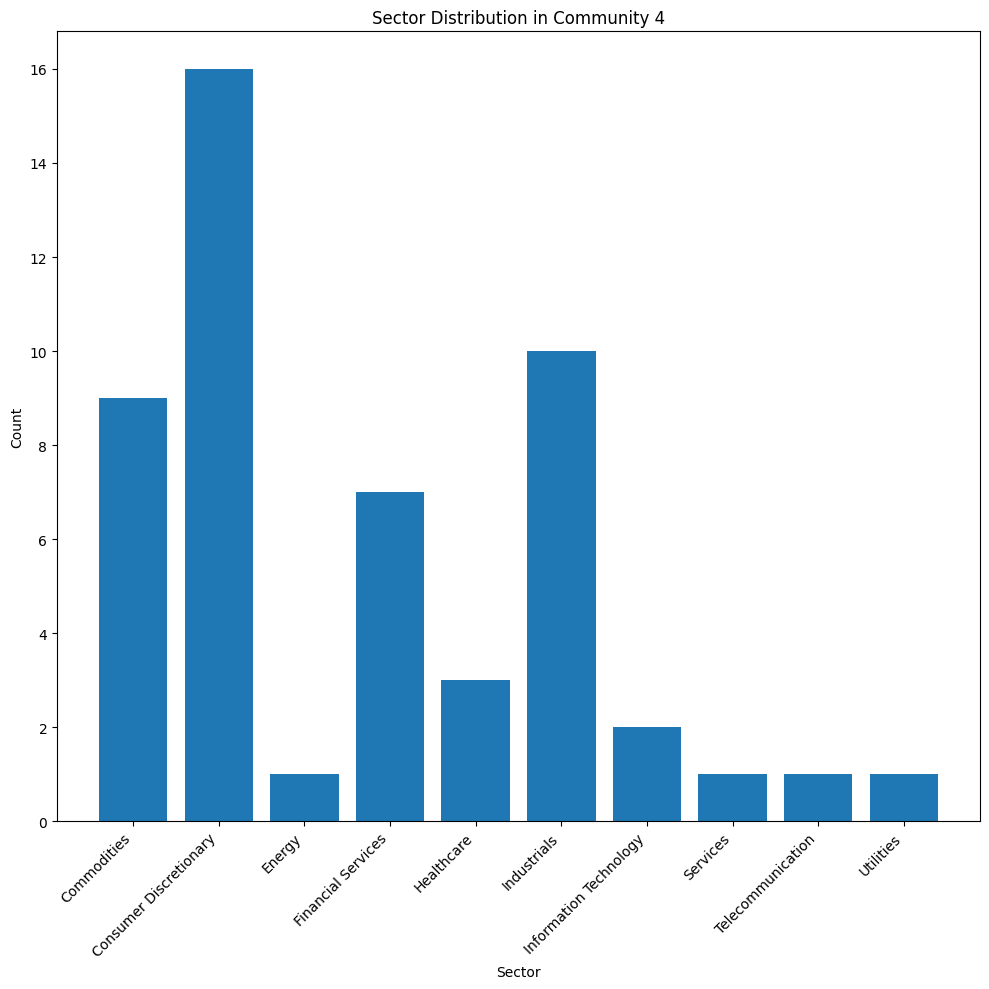

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have communities obtained using greedy_modularity_communities
communities = list(nx.community.louvain_communities(G))

# Function to find unique sectors within a community
def find_unique_sectors(community):
    unique_sectors = set()
    for comm in list(community):
        sectors = ', '.join(data.loc[data['Issuer Name'] == comm, 'Sector'].unique())
        unique_sectors.add(sectors)
    return unique_sectors

# Plot bar graphs for sector distribution within each sub-community
for i, community in enumerate(communities):
    print(f"Community {i + 1} ({len(community)} nodes): {list(community)}")

    # Find sub-communities within the current community
    sub_communities = list(nx.community.greedy_modularity_communities(G.subgraph(community)))

    # Plot sector distribution for each sub-community
    for j, sub_community in enumerate(sub_communities):
        unique_sectors = find_unique_sectors(sub_community)
        #print(f"Sub-Community {j + 1} ({len(sub_community)} nodes): {list(sub_community)}")
        #print(f"Unique Sectors: {unique_sectors}")

        # Count occurrences of each sector within the sub-community
        sector_counts = {}
        for comm in list(sub_community):
            sectors = ', '.join(data.loc[data['Issuer Name'] == comm, 'Sector'].unique())
            if sectors not in sector_counts:
                sector_counts[sectors] = 1
            else:
                sector_counts[sectors] += 1

        # Sort the sector counts by sector name
        sorted_sector_counts = dict(sorted(sector_counts.items()))

        # Increase figure size
        plt.figure(figsize=(10, 10))

        # Plot the bar graph
        plt.bar(sorted_sector_counts.keys(), sorted_sector_counts.values())
        plt.xlabel('Sector')
        plt.ylabel('Count')
        plt.title(f'Sector Distribution in Community {i + 1}')
        plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()

        print()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

algorithms = [
    ("Girvan-Newman", nx.community.girvan_newman(G)),
    ("Louvain", nx.community.louvain_communities(G)),
    ("Modularity", nx.community.greedy_modularity_communities(G)),
    ("Label Propagation", nx.community.label_propagation_communities(G)),
    ("Bipartition", nx.community.kernighan_lin_bisection(G)),
]

results = {}

for name, communities in tqdm(algorithms, desc="Running Algorithms"):
    x=list(communities)
    results[name] = len(x)

# Plot the results
plt.bar(results.keys(), results.values())
plt.xlabel('Algorithm')
plt.ylabel('Number of Communities')
plt.title('Number of Communities Detected by Each Algorithm')
plt.show()


beta measure

In [ ]:
communities_generator = nx.community.louvain_communities(G)
communities_l = list(communities_generator)  # Get the list of communities

modularity = nx.community.modularity(G, communities_l)
print("Modularity:", modularity)
print("Number of Communities:", len(communities_l))

Modularity: 0.43748752305024935
Number of Communities: 7


In [ ]:
print(communities_l)

[{'ICICI Lombard General Insurance Company Limited ', 'Bombay Burmah Trading Corpn. Ltd.,', 'Reliance Industries Ltd', 'Abbott India Ltd.', 'Hero MotoCorp Limited', 'HDFC LIFE INSURANCE COMPANY LIMITED', 'UNO Minda Limited', 'Maharashtra Seamless Ltd.', 'Nirlon Limited,', 'State Bank Of India,', 'Authum Investment & Infrastructure Limited', 'NIPPON LIFE INDIA ASSET MANAGEMENT LIMITED', 'Bajaj Electricals Ltd.,', 'Greenpanel Industries Limited', 'AXISCADES TECHNOLOGIES LIMITED', 'Krishna Institute of Medical Sciences Limited', 'Sterlite Technologies Limited.', 'WPIL Ltd', 'Kotak Mahindra Bank Ltd.', 'DCM Shriram Limited', 'PB Fintech Limited', 'Jyoti Resins & Adhesives Ltd,', 'IMAGICAAWORLD ENTERTAINMENT LIMITED', 'Filatex Fashions Ltd', 'Technocraft Industries (India) Ltd.', 'Pix Transmissions Ltd.,', 'Tata Chemicals Ltd', 'Swan Energy Ltd.', 'Alembic  Ltd', 'Sapphire Foods India Limited', 'Siyaram Silk Mills Ltd.,', 'Tatva Chintan Pharma Chem Limited', 'Shivalik Bimetal Controls Ltd.,

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load the Sensex dataset
index_data = pd.read_csv('/content/S&P BSE SENSEX data (3).csv')
index_data['Date'] = pd.to_datetime(index_data['Date'])
stock_data = final_data.copy()

In [ ]:
# Define lists to store max and min beta measures and corresponding company names for each community
max_beta_measures = []
max_beta_company_names = []
min_beta_measures = []
min_beta_company_names = []
average_beta_measures = []
# Loop through each community with tqdm for progress bar
for community in communities_l:
    community_beta_measures = []
    community_company_names = []

    # Extract historical market index data
    market_data = index_data.set_index('Date')['Close']

    # Loop through each company in the community
    for company in community:
        # Extract historical stock price data for the company
        company_data = stock_data[stock_data['Issuer Name'] == company].set_index('Date')['Close Price']
        if len(company_data) < 2:
            continue
        # Drop duplicate dates
        company_data = company_data[~company_data.index.duplicated(keep='first')]

        # Combine the data into a DataFrame
        df = pd.DataFrame({'Company': company_data.pct_change(), 'Market': market_data.pct_change()})
        df.dropna(inplace=True)  # Drop rows with NaN values

        # Fit linear regression model
        x = df[['Company']].values.reshape(-1, 1)
        y = df['Market'].values
        model = LinearRegression().fit(x, y)

        # Get beta measure
        beta_measure = model.coef_[0]
        community_beta_measures.append(beta_measure)
        community_company_names.append(company)
    print(f'Beta values for Community {community}: {community_beta_measures}')
    # Calculate average beta measure for the community
    average_beta_measure = np.mean(community_beta_measures)
    average_beta_measures.append(average_beta_measure)
    # Calculate max and min beta measures and corresponding company names for the community
    max_beta = max(community_beta_measures)
    max_beta_idx = community_beta_measures.index(max_beta)
    max_beta_company_name = community_company_names[max_beta_idx]
    min_beta = min(community_beta_measures)
    min_beta_idx = community_beta_measures.index(min_beta)
    min_beta_company_name = community_company_names[min_beta_idx]

    max_beta_measures.append(max_beta)
    max_beta_company_names.append(max_beta_company_name)
    min_beta_measures.append(min_beta)
    min_beta_company_names.append(min_beta_company_name)

    # Print max and min beta values and corresponding company names for the current community
    print(f'Max Beta for Community: {max_beta} (Company: {max_beta_company_name})')
    print(f'Min Beta for Community: {min_beta} (Company: {min_beta_company_name})')


Beta values for Community {'RAGHAV PRODUCTIVITY ENHANCERS LIMITED', 'Tata Teleservices (Maharashtra) Ltd.', 'Eris Lifesciences Limited', 'Kolte-Patil Developers Ltd', 'Ganesha Ecosphere Limited', 'GlaxoSmithkline Pharmaceuticals Ltd.', 'SJVN LIMITED', 'Prudent Corporate Advisory Services Limited', 'PAISALO DIGITAL LIMITED', 'Ratnamani Metals & Tubes Ltd', 'HDFC Asset Management Company Limited', 'Easy Trip Planners Limited', 'Bank Of Baroda', 'Saint-Gobain Sekurit India Ltd.', 'Jindal Drilling & Industries Ltd.,', 'Tarsons Products Limited', 'Jindal Steel & Power Ltd', 'Motilal Oswal Financial Services Limited', 'Voltas Ltd.,', 'NAVA LIMITED', 'Southern Petrochemical Industries Corporation Limited', 'Jammu and Kashmir Bank Ltd.', 'Bayer CropScience Limited.', 'DOLAT ALGOTECH LIMITED', 'Five-Star Business Finance Ltd.', 'Gokul Agro Resources Ltd', 'Balrampur Chini Mills Ltd.', 'Exide Industries Ltd.,', '3M India Ltd.', 'GALLANTT ISPAT LIMITED', 'Laurus Labs Limited', 'BALU FORGE INDUSTR

Beta range for Community 1: (-0.08849954048136673, 0.05373452994041435)
Beta range for Community 2: (-0.09846230617467396, 0.0719406039096293)
Beta range for Community 3: (-0.1061406442398075, 0.09349349321449846)
Beta range for Community 4: (-0.08998716019331016, 0.06018482418913294)
Beta range for Community 5: (0.022864031347289912, 0.022864031347289912)
Beta range for Community 6: (-0.031234669730682153, -0.031234669730682153)
Beta range for Community 7: (-0.021015410872838786, -0.021015410872838786)
Overall Beta range for all communities: (-0.1061406442398075, 0.09349349321449846)
Community 1 Beta Range: 0.14223407042178107
Community 2 Beta Range: 0.17040291008430325
Community 3 Beta Range: 0.19963413745430597
Community 4 Beta Range: 0.1501719843824431
Community 5 Beta Range: 0.0
Community 6 Beta Range: 0.0
Community 7 Beta Range: 0.0


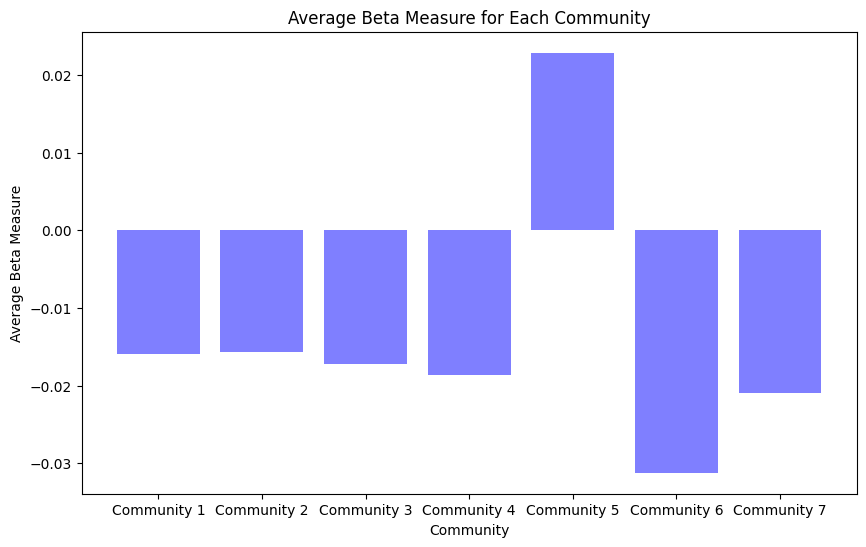

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define lists to store max and min beta measures and corresponding company names for each community
max_beta_measures = []
max_beta_company_names = []
min_beta_measures = []
min_beta_company_names = []
average_beta_measures = []
beta_ranges = []
i = 1

# Loop through each community with tqdm for progress bar
for community in communities_l:
    community_beta_measures = []
    community_company_names = []

    # Extract historical market index data
    market_data = index_data.set_index('Date')['Close']

    # Loop through each company in the community
    for company in community:
        # Extract historical stock price data for the company
        company_data = stock_data[stock_data['Issuer Name'] == company].set_index('Date')['Close Price']

        # Check if there are enough data points for linear regression
        if len(company_data) < 2:
            continue

        # Drop duplicate dates
        company_data = company_data[~company_data.index.duplicated(keep='first')]

        # Combine the data into a DataFrame
        df = pd.DataFrame({'Company': company_data.pct_change(), 'Market': market_data.pct_change()})
        df.dropna(inplace=True)  # Drop rows with NaN values

        # Check if there are enough data points after dropping NaNs
        if len(df) < 2:
            continue

        # Fit linear regression model
        x = df[['Company']].values.reshape(-1, 1)
        y = df['Market'].values
        model = LinearRegression().fit(x, y)

        # Get beta measure
        beta_measure = model.coef_[0]
        community_beta_measures.append(beta_measure)
        community_company_names.append(company)

    # Calculate max and min beta measures for the community
    if community_beta_measures:
        max_beta = max(community_beta_measures)
        min_beta = min(community_beta_measures)

        # Calculate average beta measure for the community
        average_beta_measure = np.mean(community_beta_measures)
        average_beta_measures.append(average_beta_measure)

        # Calculate beta range for the community
        beta_range = max_beta - min_beta
        beta_ranges.append(beta_range)

        # Find the index of max and min beta measures
        max_beta_idx = community_beta_measures.index(max_beta)
        min_beta_idx = community_beta_measures.index(min_beta)

        # Get corresponding company names
        max_beta_company_name = community_company_names[max_beta_idx]
        min_beta_company_name = community_company_names[min_beta_idx]

        # Append to lists
        max_beta_measures.append(max_beta)
        max_beta_company_names.append(max_beta_company_name)
        min_beta_measures.append(min_beta)
        min_beta_company_names.append(min_beta_company_name)

        # Print beta range for the current community
        print(f'Beta range for Community {i}: ({min_beta}, {max_beta})')
        i += 1

# Calculate overall range of beta for all communities
overall_min_beta = min(min_beta_measures)
overall_max_beta = max(max_beta_measures)
overall_beta_range = overall_max_beta - overall_min_beta

# Print overall beta range for all communities
print(f'Overall Beta range for all communities: ({overall_min_beta}, {overall_max_beta})')

# Print beta ranges for each community
for i, r in enumerate(beta_ranges):
    print(f'Community {i+1} Beta Range: {r}')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(communities_l)), average_beta_measures, color='blue', alpha=0.5)
plt.xlabel('Community')
plt.ylabel('Average Beta Measure')
plt.title('Average Beta Measure for Each Community')
plt.xticks(range(len(communities_l)), [f'Community {i+1}' for i in range(len(communities_l))])
plt.show()


In [ ]:
import networkx as nx
from tqdm import tqdm

# Define a function to calculate combined centrality score
def combined_centrality(graph, node):
    closeness = nx.closeness_centrality(graph)[node]
    betweenness = nx.betweenness_centrality(graph)[node]
    eigenvector = nx.eigenvector_centrality(graph)[node]
    return (closeness / 3) + (betweenness / 3) + (eigenvector / 3)

# Iterate over each subcommunity with tqdm
for community_idx, community in enumerate(tqdm(communities_l, desc="Processing Communities")):
    # Create a subgraph for the current subcommunity
    subgraph = G.subgraph(community)

    max_node = None
    max_score = -1  # Initialize maximum score to a very low value

    # Compute combined centrality score for each node in the subcommunity with tqdm
    for node in tqdm(subgraph.nodes(), desc=f"Processing Community {community_idx + 1} Nodes", leave=False):
        score = combined_centrality(subgraph, node)

        # Update max_node and max_score if the current node has a higher score
        if score > max_score:
            max_node = node
            max_score = score

    # Print the node with the highest combined centrality score in the subcommunity
    print(f"Highest combined centrality node in Community {community_idx + 1}: {max_node} with score {max_score}")


Processing Communities:  25%|██▌       | 1/4 [1:56:23<5:49:11, 6983.99s/it]

Highest combined centrality node in Community 1: NGL Fine Chem Ltd. with score 0.2791524571372193



Processing Communities:  50%|█████     | 2/4 [2:00:47<1:41:01, 3030.57s/it]

Highest combined centrality node in Community 2: MOIL Limited with score 0.3175741483665016



Processing Communities:  75%|███████▌  | 3/4 [5:13:54<1:55:37, 6937.89s/it]

Highest combined centrality node in Community 3: KPI Green Energy Limited with score 0.33400152316566256



Processing Communities: 100%|██████████| 4/4 [9:58:32<00:00, 8978.19s/it] 

Highest combined centrality node in Community 4: Magadh Sugar & Energy Limited with score 0.32551284204438097


In [ ]:
import networkx as nx
from tqdm import tqdm

# Define a function to calculate combined centrality score
def combined_centrality(graph, node):
    closeness = nx.closeness_centrality(graph)[node]
    betweenness = nx.betweenness_centrality(graph)[node]
    eigenvector = nx.eigenvector_centrality(graph)[node]
    return (closeness / 3) + (betweenness / 3) + (eigenvector / 3)

# Iterate over each subcommunity with tqdm
for community_idx, community in enumerate(tqdm(communities_l, desc="Processing Communities")):
    # Create a subgraph for the current subcommunity
    subgraph = G.subgraph(community)

    max_node = None
    max_score = -1  # Initialize maximum score to a very low value

    # Compute combined centrality score for each node in the subcommunity with tqdm
    for node in tqdm(subgraph.nodes(), desc=f"Processing Community {community_idx + 1} Nodes", leave=False):
        score = combined_centrality(subgraph, node)

        # Update max_node and max_score if the current node has a higher score
        if score > max_score:
            max_node = node
            max_score = score

    # Print the node with the highest combined centrality score in the subcommunity
    print(f"Highest combined centrality node in Community {community_idx + 1}: {max_node} with score {max_score}")


Processing Communities:  14%|█▍        | 1/7 [2:49:14<16:55:27, 10154.66s/it]

Highest combined centrality node in Community 1: Sundram Fasteners Ltd., with score 0.35275673388608814



Processing Communities:  29%|██▊       | 2/7 [4:26:23<10:34:09, 7609.97s/it] 

Highest combined centrality node in Community 2: Bharat Dynamics Limited with score 0.35397865433471865



Processing Communities:  43%|████▎     | 3/7 [5:05:36<5:47:18, 5209.71s/it] 

Highest combined centrality node in Community 3: Paras Defence and Space Technologies Limited with score 0.26000368971152793



Processing Communities:  57%|█████▋    | 4/7 [6:17:18<4:02:34, 4851.41s/it]

Highest combined centrality node in Community 4: Atul Limited., with score 0.34969645710369907



Processing Community 5 Nodes:   0%|          | 0/1 [00:00<?, ?it/s]
                                                                   

Highest combined centrality node in Community 5: Elpro International Ltd., with score 0.3333333333333333



Processing Community 6 Nodes:   0%|          | 0/1 [00:00<?, ?it/s]
                                                                   

Highest combined centrality node in Community 6: PNB Gilts Ltd with score 0.3333333333333333



Processing Communities: 100%|██████████| 7/7 [6:17:18<00:00, 3234.13s/it]  

Highest combined centrality node in Community 7: Rashtriya Chemicals & Fertilizers Limited with score 0.3333333333333333


In [ ]:
# 2. Prepare Your Graph Data
import networkx as nx
from cdlib import algorithms

# Run ASLPAw algorithm on your graph
overlapping_communities = algorithms.aslpaw(G)

# Print or process the detected overlapping communities
for i, community in enumerate(overlapping_communities.communities):
    print(f"Community {i+1}: {community}")


ModuleNotFoundError: Optional dependency not satisfied: install gmpy (conda install gmpy2) and ASLPAw (pip install shuffle_graph>=2.1.0 similarity-index-of-label-graph>=2.0.1 ASLPAw>=2.1.0). If using a notebook, you need also to restart your runtime/kernel.

In [ ]:
for i, community in enumerate(overlapping_communities.communities):
    print(f"Community {i+1}: {len(community)}")

Community 1: 1133


In [ ]:
type(overlapping_communities)

cdlib.classes.node_clustering.NodeClustering

In [ ]:
# Iterate over the detected communities
for i, community1 in enumerate(overlapping_communities.communities):
    for j, community2 in enumerate(overlapping_communities.communities):
        if i != j:  # Avoid comparing a community with itself
            # Find overlapping companies between community1 and community2
            overlapping_companies = set(community1).intersection(community2)
            if overlapping_companies:
                print(f"Overlap between Community {i+1} and Community {j+1}: {overlapping_companies}")


In [ ]:
non_overlapping_communities = nx.community.louvain_communities(G)
communities_l = list(non_overlapping_communities)
# Initialize a dictionary to store overlapping communities
overlapping_communities = {}

# Iterate through pairs of communities
for i, community1 in enumerate(non_overlapping_communities):
    for j, community2 in enumerate(non_overlapping_communities):
        if i != j:  # Avoid comparing a community with itself
            # Find overlapping nodes between community1 and community2
            overlapping_nodes = set(community1).intersection(community2)
            if overlapping_nodes:
                # Add overlapping nodes to overlapping communities
                overlapping_communities[f"Overlap {i+1}-{j+1}"] = list(overlapping_nodes)

# Print overlapping communities
for overlap_id, overlap_nodes in overlapping_communities.items():
    print(f"Overlapping Community {overlap_id}: {overlap_nodes}")


In [ ]:
for i, community1 in enumerate(non_overlapping_communities):
  print(i,len(community1))

0 334
1 319
2 112
3 368


In [ ]:
import networkx as nx
from networkx.algorithms import community

def louvain_fuzzy(G):
    # First, initialize each node with equal membership scores for all communities
    initial_membership = {node: {node} for node in G.nodes()}

    # Perform Louvain community detection
    communities_generator = nx.community.louvain_communities(G)

    # Convert the generator to a list of communities
    communities = list(communities_generator)

    # Assign membership scores to nodes based on the detected communities
    membership_scores = {node: {i: 0 for i in range(len(communities))} for node in G.nodes()}
    for i, community in enumerate(communities):
        for node in community:
            membership_scores[node][i] = 1

    return communities, membership_scores

communities, membership_scores = louvain_fuzzy(G)

# Print fuzzy communities
for i, community in enumerate(communities):
    print("Community", i+1, ":")
    for node in community:
        print("Node:", node, "Membership Scores:", membership_scores[node])
    print()


Community 1 :
Node: Medplus Health Services Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Amber Enterprises India Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Meghmani Organics Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: UTI Asset Management Company Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Power Mech Projects Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Chambal Fertilisers & Chemicals Ltd Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Shoppers Stop Ltd Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Linde India Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Alkem Laboratories Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Siemens Ltd., Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Lloyds Metals and Energy Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: GFL LIMITED Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
Node: Force Motors Limited Membership Scores: {0: 1, 1: 0, 2: 0, 3: 0}
